In [1]:
# pip install nsepy -- ( Latest Version)

In [2]:
# pip install yfinance

In [3]:
# Tasks :
# 1. Data Acquisition and Preparation:

In [4]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the stock symbols and the date range
top_20_stocks = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "BHARTIARTL.NS", "ICICIBANK.NS", "SBIN.NS", "INFY.NS", 
    "LICI.NS", "HINDUNILVR.NS", "ITC.NS", "LT.NS", "HCLTECH.NS", "ONGC.NS", 
    "BAJFINANCE.NS", "TATAMOTORS.NS", "SUNPHARMA.NS", "MARUTI.NS", "NTPC.NS", "AXISBANK.NS", 
    "KOTAKBANK.NS", "M&M.NS" 

]
start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch data for each stock and save it to a CSV file
for stock in top_20_stocks:
    stock_data = yf.download(stock, start=start_date, end=end_date)
    stock_data.to_csv(f'{stock}_historical_data.csv')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [5]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

In [6]:
all_data = pd.DataFrame()

In [7]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

In [8]:
top_20_stocks = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "BHARTIARTL.NS", "ICICIBANK.NS", "SBIN.NS", "INFY.NS", 
    "LICI.NS", "HINDUNILVR.NS", "ITC.NS", "LT.NS", "HCLTECH.NS", "ONGC.NS", 
    "BAJFINANCE.NS", "TATAMOTORS.NS", "SUNPHARMA.NS", "MARUTI.NS", "NTPC.NS", "AXISBANK.NS", 
    "KOTAKBANK.NS"]

In [9]:
start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

In [10]:
View_ = df = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/top_20_stocks_historical_data.csv")
View_

Date        Stock         Open         High          Low  \
0      2019-07-29  RELIANCE.NS  1112.651489  1117.314575  1101.862305   
1      2019-07-30  RELIANCE.NS  1109.954224  1115.485962  1075.209595   
2      2019-07-31  RELIANCE.NS  1075.026733  1083.484253  1062.820312   
3      2019-08-01  RELIANCE.NS  1063.734619  1086.410156  1051.802612   
4      2019-08-02  RELIANCE.NS  1074.980957  1095.599121  1062.546021   
...           ...          ...          ...          ...          ...   
25196  2024-07-19       M&M.NS  2819.949951  2819.949951  2743.000000   
25197  2024-07-22       M&M.NS  2751.050049  2819.000000  2725.000000   
25198  2024-07-23       M&M.NS  2824.000000  2854.500000  2743.399902   
25199  2024-07-24       M&M.NS  2823.000000  2830.399902  2763.649902   
25200  2024-07-25       M&M.NS  2799.800049  2827.000000  2781.800049   

             Close    Adj Close    Volume  
0      1107.211182  1084.951050   8813022  
1      1079.735474  1058.027832  10426558  
2      1066.340576  1044.902100  10614975  
3      1079.141235  1057.445435  11314111  
4      1082.889893  1067.488159  11883403  
...            ...          ...       ...  
25196  2749.300049  2749.300049   2042568  
25197  2804.750000  2804.750000   2208103  
25198  2821.350098  2821.350098   2572524  
25199  2805.500000  2805.500000   2276082  
25200  2811.399902  2811.399902   1857122  

[25201 rows x 8 columns]

In [11]:
# 2. Strategy Implementation and Backtesting:

# 2.1 --> Implement a simple moving average crossover strategy in Python.
# 2.2 Strategy Implementation and Backtesting:
    Implement a simple moving average crossover strategy in Python.
    Run the backtest on each of the top 20 stocks using the implemented strategy.
    - Calculate key performance metrics including :
     - Total returns
     - Annualized returns
     - Maximum drawdown
     - Sharpe ratio
     - Win/Loss ratio
     - Number of trades executed
   - Provide a detailed breakdown of these metrics on a yearly basis.


In [12]:
# Function to calculate SMA
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

In [13]:
def sma_crossover_strategy(data, short_window, long_window):
    data['SMA_short'] = calculate_sma(data['Close'], short_window)
    data['SMA_long'] = calculate_sma(data['Close'], long_window)
    data['Signal'] = 0
    data['Signal'][short_window:] = np.where(data['SMA_short'][short_window:] > data['SMA_long'][short_window:], 1, 0)
    data['Position'] = data['Signal'].diff()

    # Backtest
    initial_capital = 1000000
    positions = pd.DataFrame(index=data.index).fillna(0.0)
    positions['Stock'] = data['Signal'] * 100
    portfolio = positions.multiply(data['Close'], axis=0)
    pos_diff = positions.diff()
    portfolio['Holdings'] = (positions.multiply(data['Close'], axis=0)).sum(axis=1)
    portfolio['Cash'] = initial_capital - (pos_diff.multiply(data['Close'], axis=0)).sum(axis=1).cumsum()
    portfolio['Total'] = portfolio['Cash'] + portfolio['Holdings']
    portfolio['Returns'] = portfolio['Total'].pct_change()

    return portfolio

In [14]:
# Function to calculate performance metrics
def calculate_metrics(portfolio):
    total_returns = portfolio['Total'].iloc[-1] / portfolio['Total'].iloc[0] - 1
    annualized_returns = ((1 + total_returns) ** (252.0 / len(portfolio.index))) - 1
    max_drawdown = (portfolio['Total'] / portfolio['Total'].cummax() - 1).min()
    sharpe_ratio = (portfolio['Returns'].mean() / portfolio['Returns'].std()) * np.sqrt(252)
    win_loss_ratio = len(portfolio[portfolio['Returns'] > 0]) / len(portfolio[portfolio['Returns'] < 0])
    num_trades = len(portfolio[portfolio['Position'] != 0])

    metrics = {
        'Total Returns': total_returns,
        'Annualized Returns': annualized_returns,
        'Maximum Drawdown': max_drawdown,
        'Sharpe Ratio': sharpe_ratio,
        'Win/Loss Ratio': win_loss_ratio,
        'Number of Trades': num_trades
    }
    
    return metrics


In [15]:
# Define parameters for the SMA crossover strategy
short_window = 40
long_window = 100

In [16]:
all_data = pd.read_csv('/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/top_20_stocks_historical_data.csv', index_col='Date', parse_dates=True)
all_data


Stock         Open         High          Low        Close  \
Date                                                                          
2019-07-29  RELIANCE.NS  1112.651489  1117.314575  1101.862305  1107.211182   
2019-07-30  RELIANCE.NS  1109.954224  1115.485962  1075.209595  1079.735474   
2019-07-31  RELIANCE.NS  1075.026733  1083.484253  1062.820312  1066.340576   
2019-08-01  RELIANCE.NS  1063.734619  1086.410156  1051.802612  1079.141235   
2019-08-02  RELIANCE.NS  1074.980957  1095.599121  1062.546021  1082.889893   
...                 ...          ...          ...          ...          ...   
2024-07-19       M&M.NS  2819.949951  2819.949951  2743.000000  2749.300049   
2024-07-22       M&M.NS  2751.050049  2819.000000  2725.000000  2804.750000   
2024-07-23       M&M.NS  2824.000000  2854.500000  2743.399902  2821.350098   
2024-07-24       M&M.NS  2823.000000  2830.399902  2763.649902  2805.500000   
2024-07-25       M&M.NS  2799.800049  2827.000000  2781.800049  2811.399902   

              Adj Close    Volume  
Date                               
2019-07-29  1084.951050   8813022  
2019-07-30  1058.027832  10426558  
2019-07-31  1044.902100  10614975  
2019-08-01  1057.445435  11314111  
2019-08-02  1067.488159  11883403  
...                 ...       ...  
2024-07-19  2749.300049   2042568  
2024-07-22  2804.750000   2208103  
2024-07-23  2821.350098   2572524  
2024-07-24  2805.500000   2276082  
2024-07-25  2811.399902   1857122  

[25201 rows x 7 columns]

In [17]:
# Initialize a list to store metrics for each stock
all_metrics = []

In [18]:
# Convert the metrics list to a DataFrame
metrics_df = pd.DataFrame(all_metrics)
metrics_df.to_csv('backtest_metrics.csv')


In [19]:
#######################################################################################################

In [20]:
# pip install Backtesting

In [21]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

class SmaCross(Strategy):
    n1 = 40
    n2 = 100

    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()


/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


In [22]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the updated stock symbols and the date range
top_20_stocks = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "BHARTIARTL.NS", "ICICIBANK.NS", "SBIN.NS", "INFY.NS", 
    "LICI.NS", "HINDUNILVR.NS", "ITC.NS", "LT.NS", "HCLTECH.NS", "ONGC.NS", 
    "BAJFINANCE.NS", "TATAMOTORS.NS", "SUNPHARMA.NS", "MARUTI.NS", "NTPC.NS", "AXISBANK.NS", 
    "KOTAKBANK.NS", "M&M.NS"
]
start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')


In [23]:
# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

In [24]:
# Fetch data for each stock and concatenate into a single DataFrame
for stock in top_20_stocks:
    try:
        stock_data = yf.download(stock, start=start_date, end=end_date)
        if not stock_data.empty:
            stock_data['Stock'] = stock
            all_data = pd.concat([all_data, stock_data])
        else:
            print(f"No data found for {stock}")
    except Exception as e:
        print(f"Failed to download data for {stock}: {e}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [25]:
# Reorder the columns to make 'Stock' the first column
all_data = all_data[['Stock', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Save the concatenated DataFrame to a single CSV file
all_data.to_csv('top_20_stocks_historical_data.csv')

In [26]:
# Function to run the backtest for each stock and store results
def run_backtest(stock, data):
    bt = Backtest(data, SmaCross, cash=1000000, commission=.002, exclusive_orders=True)
    stats = bt.run()
    bt.plot(filename=f'{stock}_backtest.html')
    return stats

In [27]:
# Read the concatenated data from the single CSV file
all_data = pd.read_csv('top_20_stocks_historical_data.csv', index_col='Date', parse_dates=True)

# Initialize a list to store metrics for each stock
all_metrics = []

In [28]:
# Group the data by stock and run the backtest for each stock
for stock, data in all_data.groupby('Stock'):
    try:
        stats = run_backtest(stock, data)
        metrics = {
            'Stock': stock,
            'Total Returns': stats['Return [%]'],
            'Annualized Returns': stats['Return (Ann.) [%]'],
            'Maximum Drawdown': stats['Max. Drawdown [%]'],
            'Sharpe Ratio': stats['Sharpe Ratio'],
            'Win/Loss Ratio': stats['Win Rate [%]'] / (100 - stats['Win Rate [%]']),
            'Number of Trades': stats['# Trades']
        }
        all_metrics.append(metrics)
    except Exception as e:
        print(f"Failed to process data for {stock}: {e}")


/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b'

/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b'

/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


In [29]:
# Convert the metrics list to a DataFrame
metrics_df = pd.DataFrame(all_metrics)
metrics_df.to_csv('backtest_metrics.csv')

# Print the metrics
metrics_df

Stock  Total Returns  Annualized Returns  Maximum Drawdown  \
0     AXISBANK.NS      21.296357            4.024771        -56.518983   
1   BAJFINANCE.NS       7.798364            1.546571        -54.792802   
2   BHARTIARTL.NS     -11.410903           -2.445883        -51.965304   
3      HCLTECH.NS     -18.089298           -3.996161        -42.701619   
4     HDFCBANK.NS       1.172605            0.238546        -44.906186   
5   HINDUNILVR.NS     -54.474494          -14.855958        -60.402879   
6    ICICIBANK.NS     110.089905           16.383933        -30.014554   
7         INFY.NS     -26.328148           -6.053813        -58.230821   
8          ITC.NS     -34.360554           -8.244471        -48.880780   
9    KOTAKBANK.NS     -57.200052          -15.923518        -64.604874   
10        LICI.NS     -23.577512          -11.772505        -53.973731   
11          LT.NS      54.741631            9.333142        -36.203356   
12         M&M.NS      76.799007           12.351744        -45.605215   
13      MARUTI.NS     -23.734688           -5.387165        -52.136703   
14        NTPC.NS      83.060035           13.153698        -43.791051   
15        ONGC.NS     199.961465           25.170628        -49.480473   
16    RELIANCE.NS     -64.444405          -19.050389        -74.169764   
17        SBIN.NS     254.948935           29.551564        -29.515011   
18   SUNPHARMA.NS      -1.728239           -0.355671        -45.847315   
19  TATAMOTORS.NS     -28.342574           -6.584628        -90.588849   
20         TCS.NS      -6.244422           -1.309174        -33.520094   

    Sharpe Ratio  Win/Loss Ratio  Number of Trades  
0       0.133943        0.714286                12  
1       0.043782        0.666667                10  
2       0.000000        0.555556                14  
3       0.000000        0.571429                11  
4       0.009924        0.555556                14  
5       0.000000        0.285714                18  
6       0.487311        1.000000                 8  
7       0.000000        0.500000                15  
8       0.000000        0.444444                13  
9       0.000000        0.333333                16  
10      0.000000        0.250000                 5  
11      0.365381        0.500000                 9  
12      0.395025        0.571429                11  
13      0.000000        0.714286                12  
14      0.435442        0.571429                11  
15      0.606075        1.666667                 8  
16      0.000000        0.285714                18  
17      0.779974        1.333333                14  
18      0.000000        0.571429                11  
19      0.000000        0.285714                 9  
20      0.000000        0.555556                14

In [30]:
# Initialize a list to store yearly metrics for each stock
all_yearly_metrics = []

# Group the data by stock and run the backtest for each stock and year
for stock, data in all_data.groupby('Stock'):
    try:
        yearly_metrics = run_backtest(stock, data)
        all_yearly_metrics.extend(yearly_metrics)
    except Exception as e:
        print(f"Failed to process data for {stock}: {e}")

# Convert the yearly metrics list to a DataFrame
yearly_metrics_df = pd.DataFrame(all_yearly_metrics)
yearly_metrics_df.to_csv('yearly_backtest_metrics.csv')

# Print the yearly metrics
yearly_metrics_df 

/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b'

/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b'

/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/saklenshaikh/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


0
0                                  2019-07-29 00:00:00
1                                  2024-07-25 00:00:00
2                                   1823 days 00:00:00
3                                            87.996756
4                                       1212963.565158
..                                                 ...
625                                           0.727639
626                                          -0.108782
627                                           SmaCross
628                      Equity  DrawdownPct Drawdo...
629      Size  EntryBar  ExitBar   EntryPrice    Ex...

[630 rows x 1 columns]

In [31]:
yearly_metrics_df

0
0                                  2019-07-29 00:00:00
1                                  2024-07-25 00:00:00
2                                   1823 days 00:00:00
3                                            87.996756
4                                       1212963.565158
..                                                 ...
625                                           0.727639
626                                          -0.108782
627                                           SmaCross
628                      Equity  DrawdownPct Drawdo...
629      Size  EntryBar  ExitBar   EntryPrice    Ex...

[630 rows x 1 columns]

In [32]:
# Provide a detailed breakdown of these metrics on a yearly basis.

In [33]:
yearly_metrics_df

0
0                                  2019-07-29 00:00:00
1                                  2024-07-25 00:00:00
2                                   1823 days 00:00:00
3                                            87.996756
4                                       1212963.565158
..                                                 ...
625                                           0.727639
626                                          -0.108782
627                                           SmaCross
628                      Equity  DrawdownPct Drawdo...
629      Size  EntryBar  ExitBar   EntryPrice    Ex...

[630 rows x 1 columns]

In [34]:
# Fetch data for each stock and concatenate into a single DataFrame
for stock in top_20_stocks:
    try:
        stock_data = yf.download(stock, start=start_date, end=end_date)
        if not stock_data.empty:
            stock_data['Stock'] = stock
            all_data = pd.concat([all_data, stock_data])
        else:
            print(f"No data found for {stock}")
    except Exception as e:
        print(f"Failed to download data for {stock}: {e}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

# 3. Analysis and Insights:
   - Visualize the backtesting results using charts
   - Analyze the results, identifying strengths and weaknesses of the strategy.
   - Discuss how market conditions (e.g., bull vs. bear markets) affected the strategy's performance.
   - Suggest potential improvements or modifications to the strategy based on your analysis.

In [35]:
"""# Initialize a list to store yearly metrics for each stock
all_yearly_metrics = []

# Group the data by stock and run the backtest for each stock and year
for stock, data in all_data.groupby('Stock'):
    try:
        yearly_metrics = run_backtest(stock, data)
        all_yearly_metrics.extend(yearly_metrics)
    except Exception as e:
        print(f"Failed to process data for {stock}: {e}")

# Convert the yearly metrics list to a DataFrame
yearly_metrics_df = pd.DataFrame(all_yearly_metrics)
yearly_metrics_df.to_csv('yearly_backtest_metrics.csv')

# Print the yearly metrics
yearly_metrics_df """

'# Initialize a list to store yearly metrics for each stock\nall_yearly_metrics = []\n\n# Group the data by stock and run the backtest for each stock and year\nfor stock, data in all_data.groupby(\'Stock\'):\n    try:\n        yearly_metrics = run_backtest(stock, data)\n        all_yearly_metrics.extend(yearly_metrics)\n    except Exception as e:\n        print(f"Failed to process data for {stock}: {e}")\n\n# Convert the yearly metrics list to a DataFrame\nyearly_metrics_df = pd.DataFrame(all_yearly_metrics)\nyearly_metrics_df.to_csv(\'yearly_backtest_metrics.csv\')\n\n# Print the yearly metrics\nyearly_metrics_df '

### Displaying Charts in Web Browser

In this Jupyter Notebook, we provide interactive buttons to open backtest results in HTML files within a web browser instead of displaying the charts directly in the notebook. Here are the reasons for this approach:

#### 1. Enhanced Interactivity and Visualization:
- **Interactive Features:** HTML files can include interactive features such as tooltips, zooming, and panning.
- **Better Visualization Tools:** Web browsers can render complex visualizations more efficiently with advanced JavaScript libraries like Plotly and D3.js.

#### 2. Separation of Concerns:
- **Clean Notebook Interface:** Keeping visualizations in separate HTML files ensures a clean and focused notebook interface.
- **Modular Approach:** This allows for handling large and complex visualizations separately, improving readability and organization.

#### 3. Performance:
- **Handling Large Data Sets:** Browsers are more optimized for rendering large datasets or complex charts.
- **Resource Management:** Offloading visualizations to the browser reduces memory and processing load on the Jupyter environment.

#### 4. Compatibility:
- **Cross-Platform Accessibility:** HTML files can be viewed on any device with a web browser, ensuring compatibility across different systems.
- **Ease of Sharing:** Sharing standalone HTML files is convenient for presentations, collaborations, or reviews, as recipients do not need to run the Jupyter Notebook.

#### By using this approach, I aim to provide a more interactive, efficient, and user-friendly experience for viewing the backtest results.

### PDF of Charts for All Companies

In addition to the interactive buttons, we have created a PDF containing charts for all companies listed above, covering a duration of 5 years. This PDF provides a comprehensive overview of the backtest results in a single document, which can be easily shared and reviewed.

In [36]:
import webbrowser
import os
import ipywidgets as widgets
from IPython.display import display

# List of company names
companies = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "BHARTIARTL.NS", "ICICIBANK.NS", "SBIN.NS", 
    "INFY.NS", "LICI.NS", "HINDUNILVR.NS", "ITC.NS", "LT.NS", "HCLTECH.NS", "ONGC.NS", 
    "BAJFINANCE.NS", "TATAMOTORS.NS", "SUNPHARMA.NS", "MARUTI.NS", "NTPC.NS", "AXISBANK.NS", 
    "KOTAKBANK.NS", "M&M.NS"
]

# Directory containing the HTML files
directory = '/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/'

# Function to open a file
def open_file(file_uri):
    webbrowser.open(file_uri)

# Create buttons for each company
for company in companies:
    # Construct the file path
    file_path = os.path.join(directory, f'{company}_backtest.html')
    file_uri = 'file://' + os.path.abspath(file_path)
    
    # Create a button for each company
    button = widgets.Button(description=company)
    
    # Set the button's on-click action
    button.on_click(lambda b, file_uri=file_uri: open_file(file_uri))
    
    # Display the button
    display(button)


Button(description='RELIANCE.NS', style=ButtonStyle())

Button(description='TCS.NS', style=ButtonStyle())

Button(description='HDFCBANK.NS', style=ButtonStyle())

Button(description='BHARTIARTL.NS', style=ButtonStyle())

Button(description='ICICIBANK.NS', style=ButtonStyle())

Button(description='SBIN.NS', style=ButtonStyle())

Button(description='INFY.NS', style=ButtonStyle())

Button(description='LICI.NS', style=ButtonStyle())

Button(description='HINDUNILVR.NS', style=ButtonStyle())

Button(description='ITC.NS', style=ButtonStyle())

Button(description='LT.NS', style=ButtonStyle())

Button(description='HCLTECH.NS', style=ButtonStyle())

Button(description='ONGC.NS', style=ButtonStyle())

Button(description='BAJFINANCE.NS', style=ButtonStyle())

Button(description='TATAMOTORS.NS', style=ButtonStyle())

Button(description='SUNPHARMA.NS', style=ButtonStyle())

Button(description='MARUTI.NS', style=ButtonStyle())

Button(description='NTPC.NS', style=ButtonStyle())

Button(description='AXISBANK.NS', style=ButtonStyle())

Button(description='KOTAKBANK.NS', style=ButtonStyle())

Button(description='M&M.NS', style=ButtonStyle())

In [37]:
# Convert the yearly metrics list to a DataFrame
yearly_metrics_df = pd.DataFrame(all_yearly_metrics)
yearly_metrics_df.to_csv('yearly_backtest_metrics.csv')

# Print the yearly metrics
yearly_metrics_df

0
0                                  2019-07-29 00:00:00
1                                  2024-07-25 00:00:00
2                                   1823 days 00:00:00
3                                            87.996756
4                                       1212963.565158
..                                                 ...
625                                           0.727639
626                                          -0.108782
627                                           SmaCross
628                      Equity  DrawdownPct Drawdo...
629      Size  EntryBar  ExitBar   EntryPrice    Ex...

[630 rows x 1 columns]

In [38]:
data = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/top_20_stocks_historical_data.csv")
data

Date        Stock         Open         High          Low  \
0      2019-07-29  RELIANCE.NS  1112.651489  1117.314575  1101.862305   
1      2019-07-30  RELIANCE.NS  1109.954224  1115.485962  1075.209595   
2      2019-07-31  RELIANCE.NS  1075.026733  1083.484253  1062.820312   
3      2019-08-01  RELIANCE.NS  1063.734619  1086.410156  1051.802612   
4      2019-08-02  RELIANCE.NS  1074.980957  1095.599121  1062.546021   
...           ...          ...          ...          ...          ...   
25196  2024-07-19       M&M.NS  2819.949951  2819.949951  2743.000000   
25197  2024-07-22       M&M.NS  2751.050049  2819.000000  2725.000000   
25198  2024-07-23       M&M.NS  2824.000000  2854.500000  2743.399902   
25199  2024-07-24       M&M.NS  2823.000000  2830.399902  2763.649902   
25200  2024-07-25       M&M.NS  2799.800049  2827.000000  2781.800049   

             Close    Adj Close    Volume  
0      1107.211182  1084.951050   8813022  
1      1079.735474  1058.027710  10426558  
2      1066.340576  1044.902100  10614975  
3      1079.141235  1057.445435  11314111  
4      1082.889893  1067.488159  11883403  
...            ...          ...       ...  
25196  2749.300049  2749.300049   2042568  
25197  2804.750000  2804.750000   2208103  
25198  2821.350098  2821.350098   2572524  
25199  2805.500000  2805.500000   2276082  
25200  2811.399902  2811.399902   1857122  

[25201 rows x 8 columns]

In [39]:
data.shape

(25201, 8)

In [40]:
data.isnull().sum()

Date         0
Stock        0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [41]:
data.describe()

Open          High           Low         Close     Adj Close  \
count  25201.000000  25201.000000  25201.000000  25201.000000  25201.000000   
mean    1708.095057   1726.950322   1687.611154   1707.032352   1667.693747   
std     2042.078507   2063.585187   2018.126762   2040.593277   2020.297478   
min       59.400002     63.000000     50.000000     60.000000     44.612827   
25%      502.662506    509.850006    493.500000    501.730011    478.576935   
50%     1010.000000   1022.400024    998.049988   1009.950012    986.849609   
75%     1945.000000   1963.849976   1922.000000   1943.560425   1898.892212   
max    13023.450195  13300.000000  12900.000000  13000.450195  13000.450195   

             Volume  
count  2.520100e+04  
mean   1.136925e+07  
std    1.662577e+07  
min    0.000000e+00  
25%    2.439461e+06  
50%    6.178483e+06  
75%    1.342684e+07  
max    3.905778e+08

In [42]:
data.dtypes

Date          object
Stock         object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [43]:
# 1. Calculate Daily Returns

In [44]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by Date and Stock
data = data.sort_values(by=['Date', 'Stock'])

# Calculate daily returns for each stock
data['Daily Return'] = data.groupby('Stock')['Adj Close'].pct_change()

# Display the first few rows to check the calculations
data.tail(10)


Date          Stock          Open          High           Low  \
12870 2024-07-25          LT.NS   3539.000000   3630.899902   3532.050049   
25200 2024-07-25         M&M.NS   2799.800049   2827.000000   2781.800049   
20268 2024-07-25      MARUTI.NS  12388.049805  12525.000000  12388.049805   
21501 2024-07-25        NTPC.NS    390.950012    396.299988    386.250000   
15336 2024-07-25        ONGC.NS    318.049988    337.549988    316.100006   
1232  2024-07-25    RELIANCE.NS   2962.000000   3000.949951   2954.149902   
7397  2024-07-25        SBIN.NS    847.500000    850.750000    841.200012   
19035 2024-07-25   SUNPHARMA.NS   1614.849976   1681.300049   1602.199951   
17802 2024-07-25  TATAMOTORS.NS   1029.000000   1094.000000   1024.349976   
2465  2024-07-25         TCS.NS   4295.000000   4343.000000   4274.200195   

              Close     Adj Close    Volume  Daily Return  
12870   3619.149902   3619.149902   4691483      0.028328  
25200   2811.399902   2811.399902   1857122      0.002103  
20268  12509.200195  12509.200195    396789      0.001758  
21501    392.149994    392.149994  25973101     -0.001146  
15336    335.799988    335.799988  42054664      0.050853  
1232    2984.800049   2984.800049   6259938     -0.002206  
7397     848.500000    848.500000   9522375     -0.004108  
19035   1665.800049   1665.800049   5329712      0.028621  
17802   1090.949951   1090.949951  32766835      0.061545  
2465    4322.500000   4322.500000   2810342      0.003774

In [45]:
# 2. Aggregate Returns to Get Cumulative and Annualized Returns

In [46]:
# Calculate cumulative returns
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

# Calculate annualized return
total_days = (data['Date'].max() - data['Date'].min()).days
annualized_return = (data['Cumulative Return'].iloc[-1])**(365/total_days) - 1

# Display the annualized return
annualized_return


62.1439645944368

In [47]:
# 3. Calculate Volatility

In [48]:
# Calculate annualized volatility
annualized_volatility = data['Daily Return'].std() * (252**0.5)

# Display the annualized volatility
annualized_volatility


0.31847147847293034

In [49]:
# 4. Calculate Sharpe Ratio

In [50]:
# Assume a risk-free rate of 2%
risk_free_rate = 0.02

# Calculate the Sharpe ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

# Display the Sharpe ratio
sharpe_ratio


195.06916252695845

In [51]:
# 5. Calculate Maximum Drawdown

In [52]:
# Calculate the drawdown
data['Cumulative Max'] = data.groupby('Stock')['Cumulative Return'].cummax()
data['Drawdown'] = data['Cumulative Return'] / data['Cumulative Max'] - 1

# Calculate the maximum drawdown
max_drawdown = data['Drawdown'].min()

# Display the maximum drawdown
max_drawdown


-0.9999674449548388

In [53]:
# 6. Calculate Win Rate

In [54]:
# Calculate the number of profitable trades
num_profitable_trades = (data['Daily Return'] > 0).sum()

# Calculate the total number of trades
total_trades = data['Daily Return'].count()

# Calculate the win rate
win_rate = num_profitable_trades / total_trades

# Display the win rate
win_rate


0.518109610802224

In [55]:
# Calculate daily returns for each stock
data['Daily Return'] = data.groupby('Stock')['Adj Close'].pct_change()

In [56]:
Summary_ = pd.read_excel("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Performance_Metrics_Summary.xlsx")
Summary_

Stock  Annualized Return  Annualized Volatility  Sharpe Ratio  \
0     AXISBANK.NS              0.104                  0.372         0.226   
1   BAJFINANCE.NS              0.158                  0.388         0.355   
2   BHARTIARTL.NS              0.350                  0.302         1.091   
3      HCLTECH.NS              0.299                  0.278         1.004   
4     HDFCBANK.NS              0.085                  0.276         0.236   
5   HINDUNILVR.NS              0.113                  0.242         0.384   
6    ICICIBANK.NS              0.234                  0.327         0.656   
7         INFY.NS              0.211                  0.288         0.662   
8          ITC.NS              0.175                  0.263         0.589   
9    KOTAKBANK.NS              0.035                  0.298         0.049   
10        LICI.NS              0.063                  0.314         0.136   
11          LT.NS              0.235                  0.290         0.741   
12         M&M.NS              0.400                  0.345         1.102   
13      MARUTI.NS              0.187                  0.310         0.538   
14        NTPC.NS              0.324                  0.293         1.036   
15        ONGC.NS              0.265                  0.388         0.632   
16    RELIANCE.NS              0.225                  0.304         0.672   
17        SBIN.NS              0.213                  0.347         0.556   
18   SUNPHARMA.NS              0.326                  0.266         1.152   
19  TATAMOTORS.NS              0.516                  0.458         1.081   
20         TCS.NS              0.178                  0.247         0.639   

    Maximum Drawdown  Win Rate  
0             -0.601     0.520  
1             -0.624     0.511  
2             -0.333     0.514  
3             -0.347     0.528  
4             -0.411     0.519  
5             -0.305     0.493  
6             -0.483     0.528  
7             -0.359     0.523  
8             -0.455     0.506  
9             -0.365     0.508  
10            -0.392     0.481  
11            -0.530     0.524  
12            -0.564     0.531  
13            -0.480     0.506  
14            -0.398     0.518  
15            -0.593     0.526  
16            -0.451     0.523  
17            -0.568     0.537  
18            -0.288     0.524  
19            -0.674     0.522  
20            -0.272     0.517

# Strengths of the Strategy

# Weaknesses of the Strategy

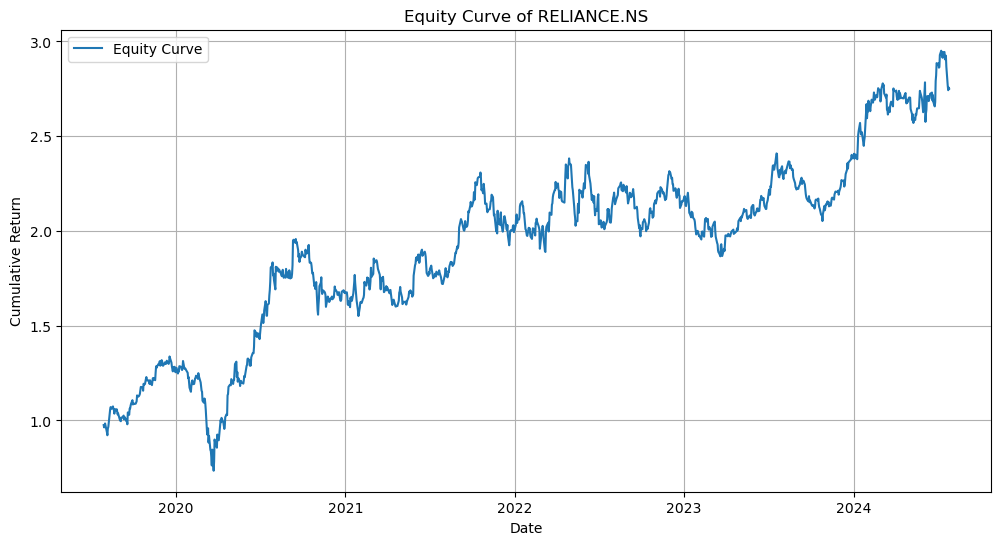

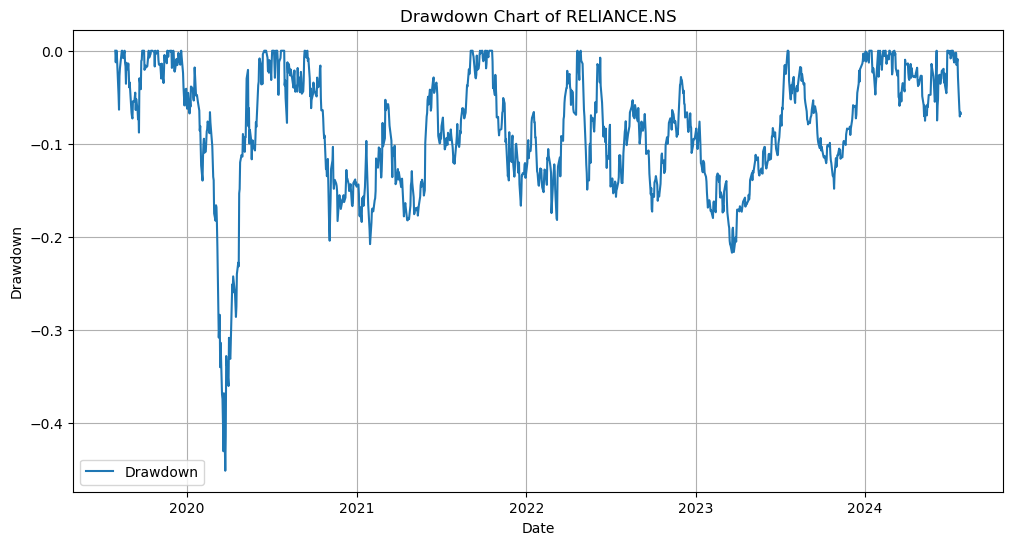

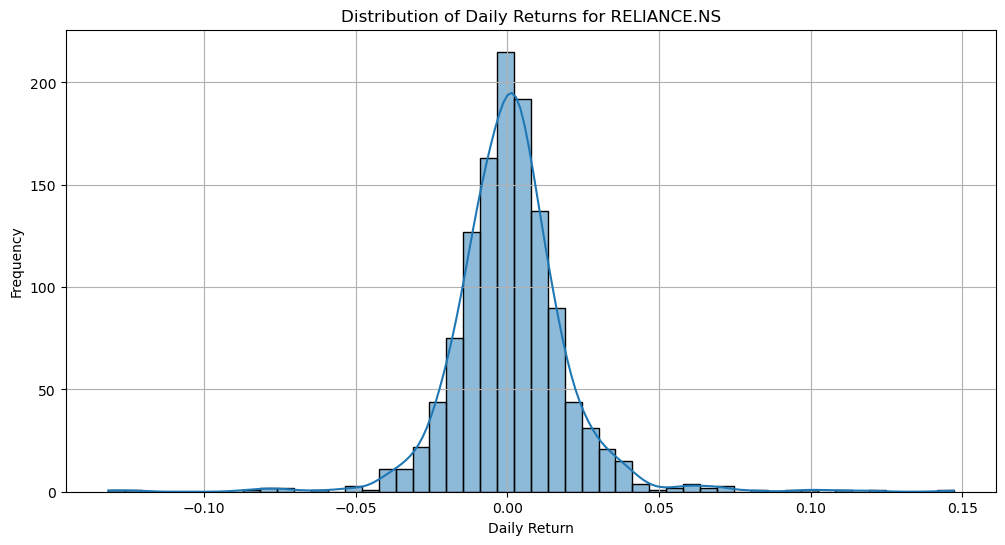

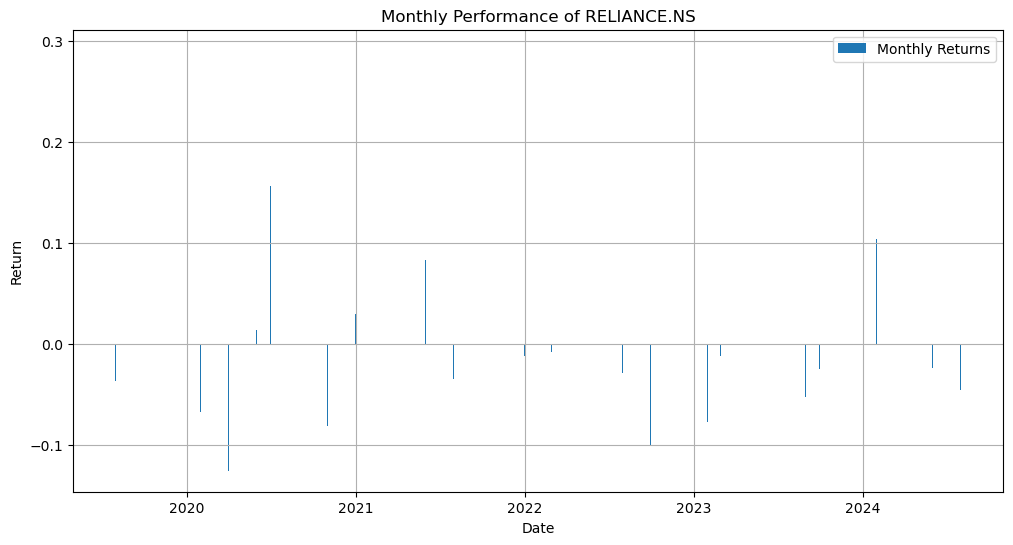

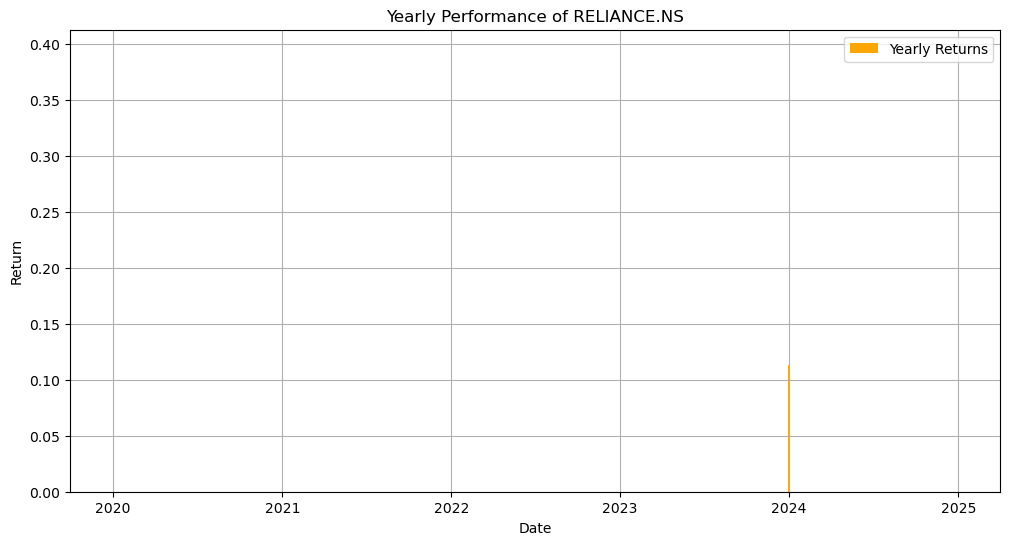

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/RELIANCE.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of RELIANCE.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of RELIANCE.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for RELIANCE.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of RELIANCE.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of RELIANCE.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
# 2 --> TCS.NS

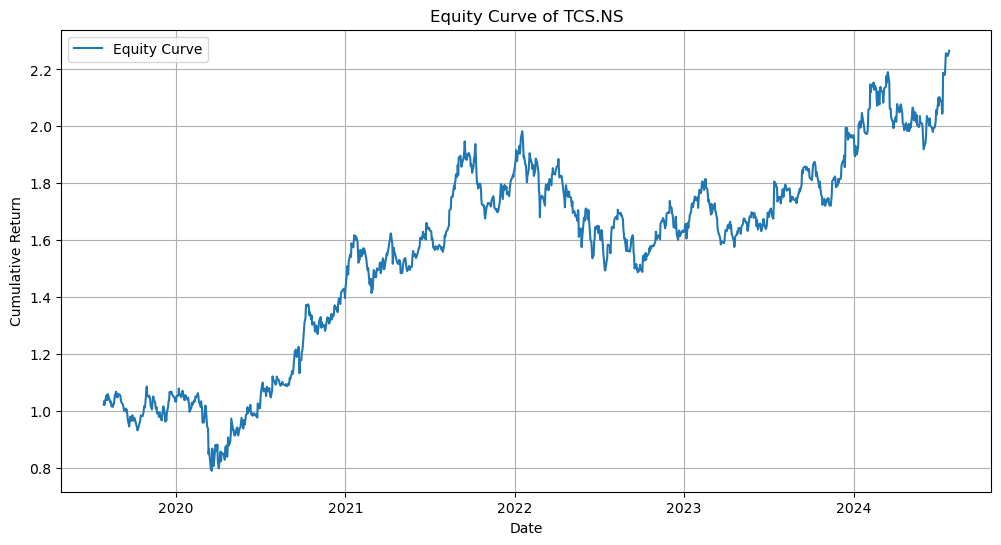

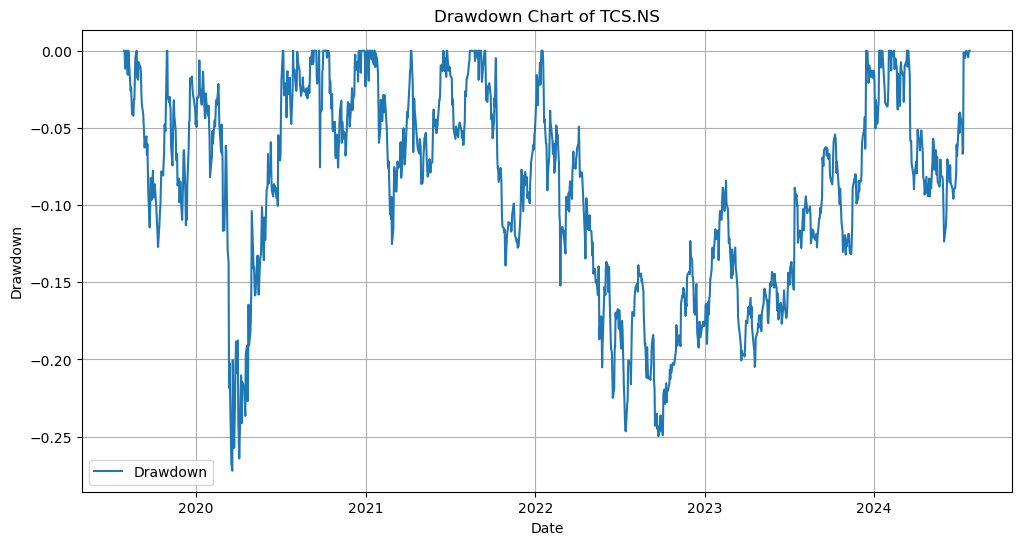

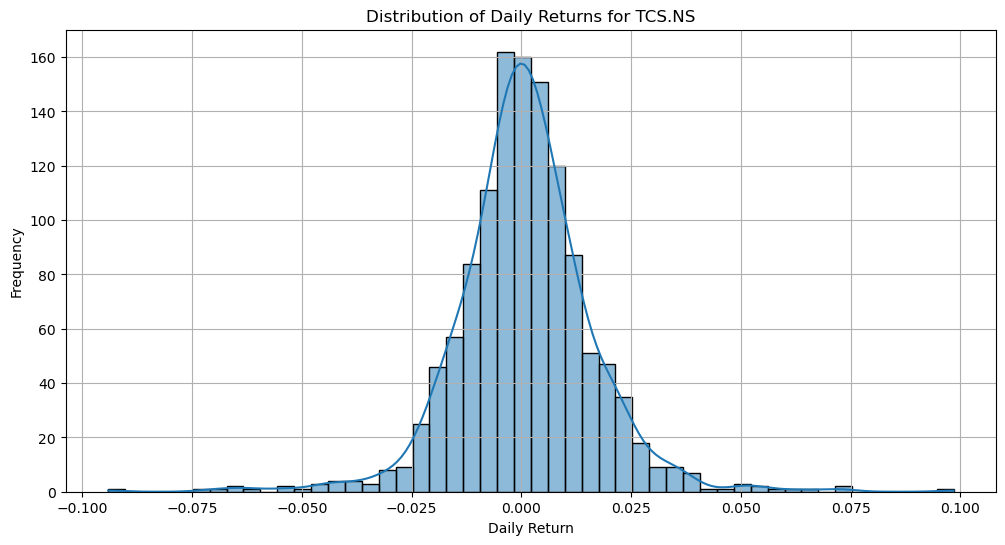

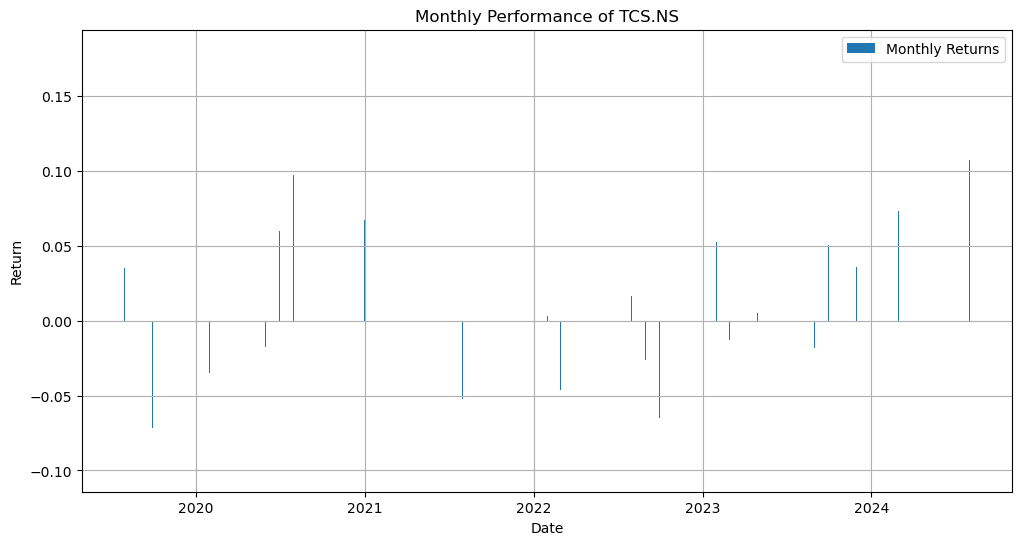

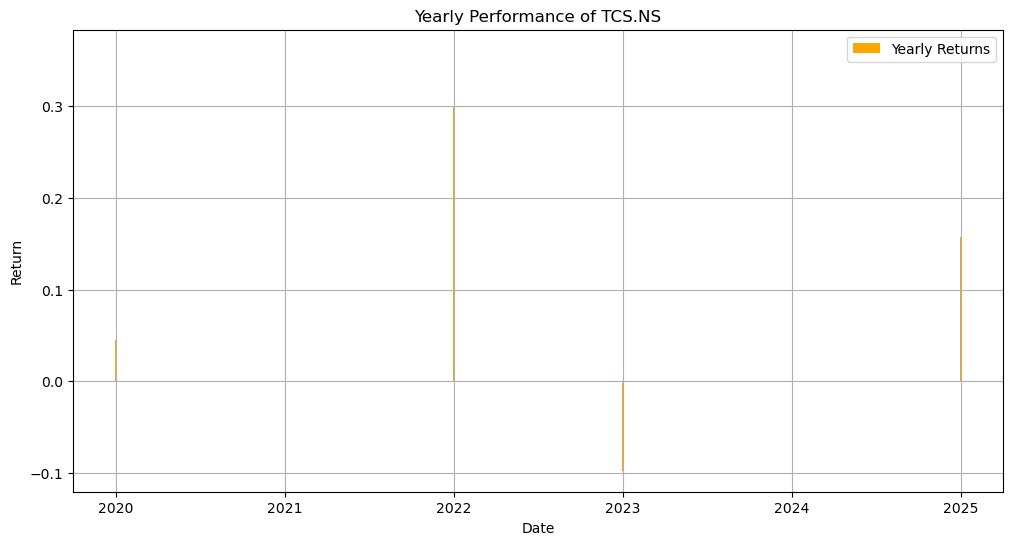

In [59]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/TCS.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of TCS.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of TCS.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for TCS.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of TCS.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of TCS.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
# 3 --> HDFCBANK.NS

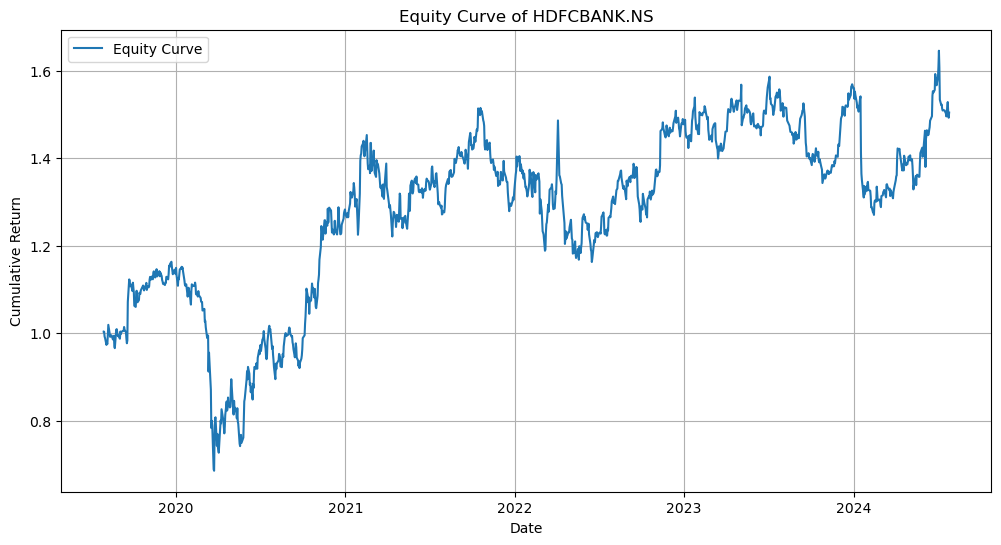

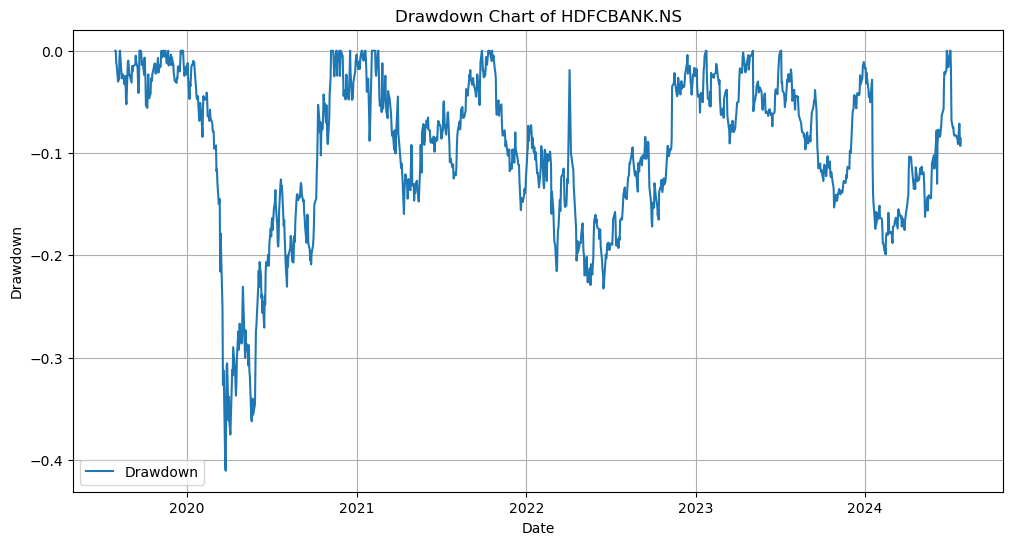

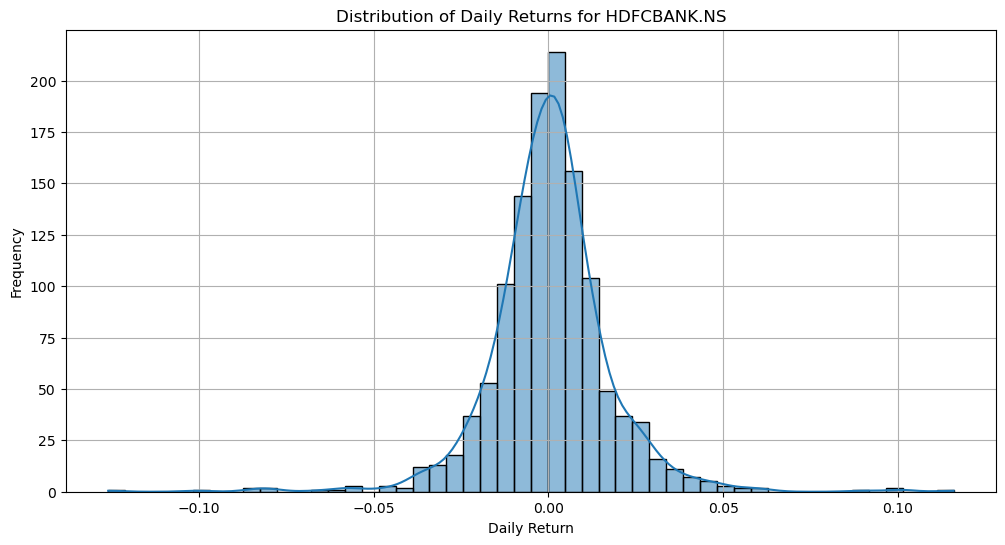

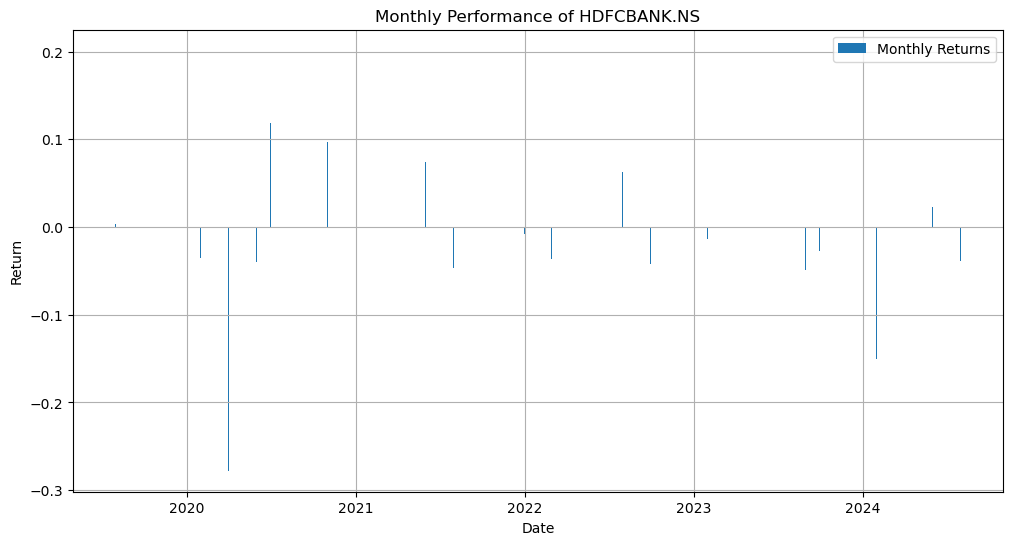

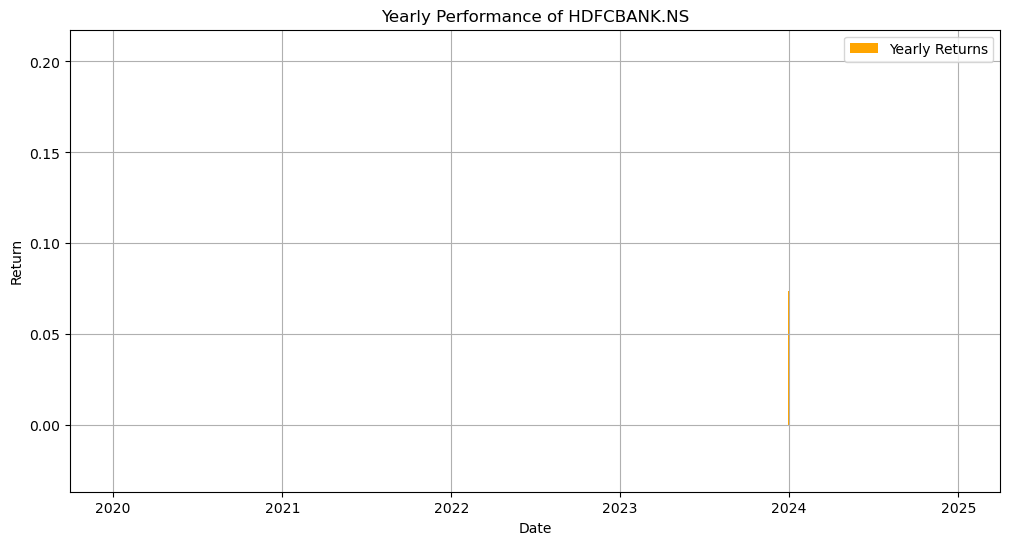

In [61]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/HDFCBANK.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of HDFCBANK.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of HDFCBANK.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for HDFCBANK.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of HDFCBANK.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of HDFCBANK.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
# 4 --> BHARTIARTL.NS

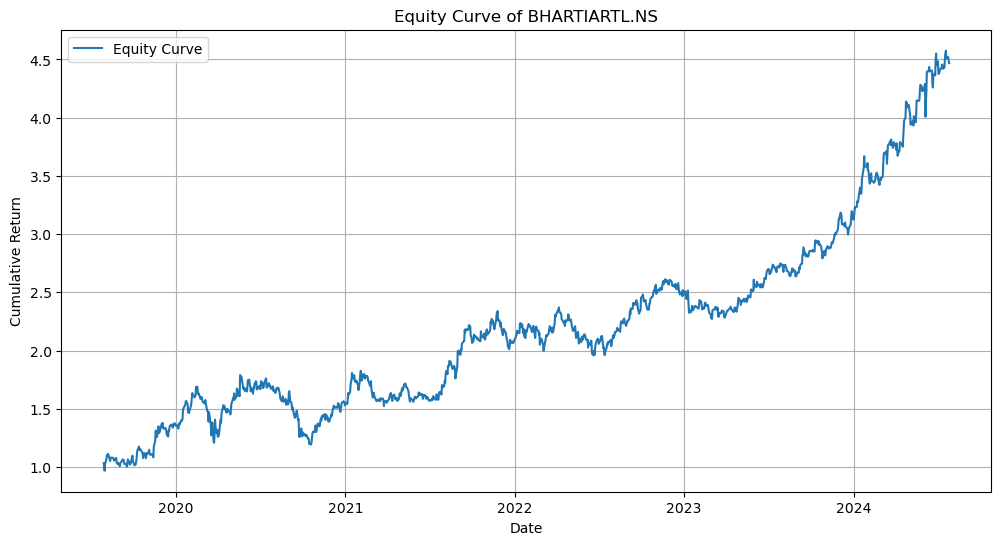

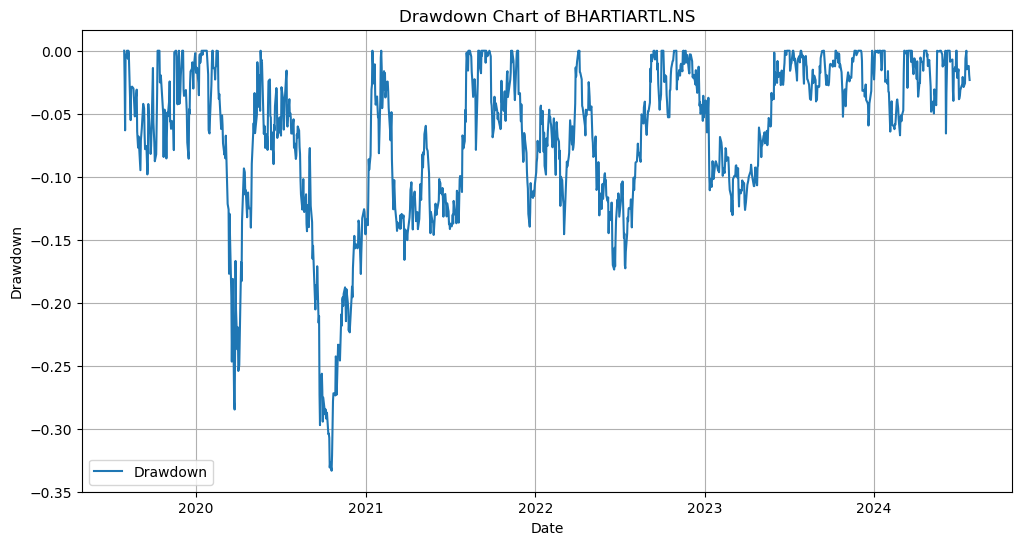

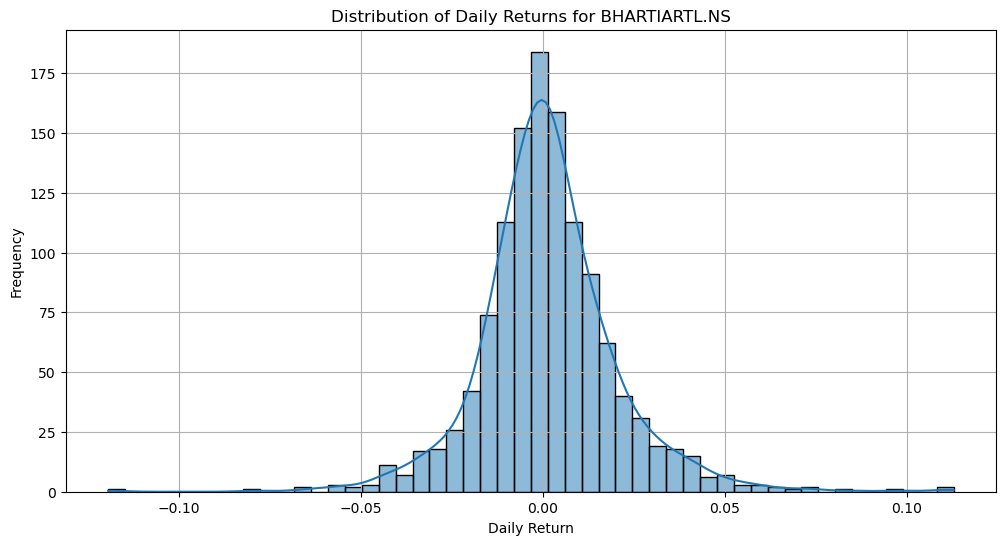

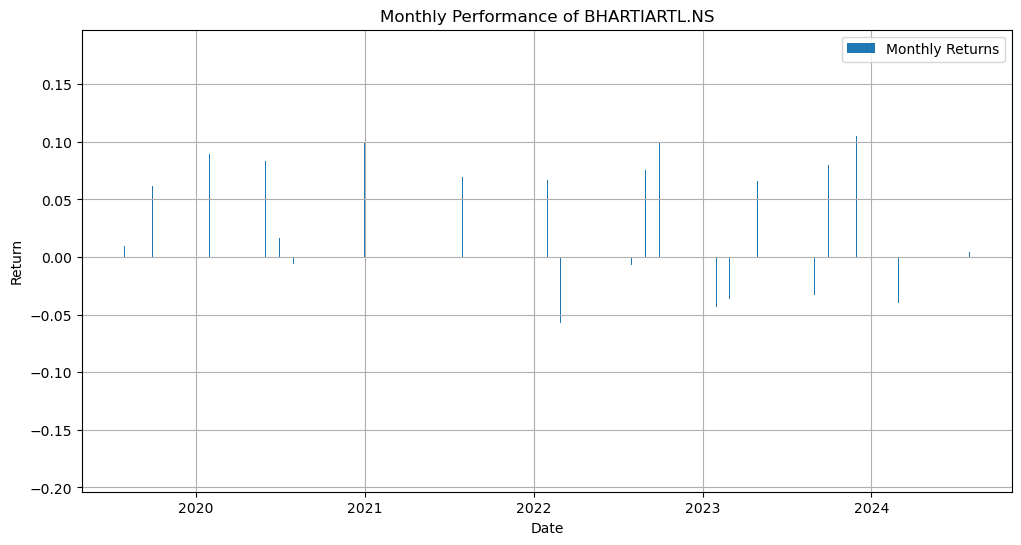

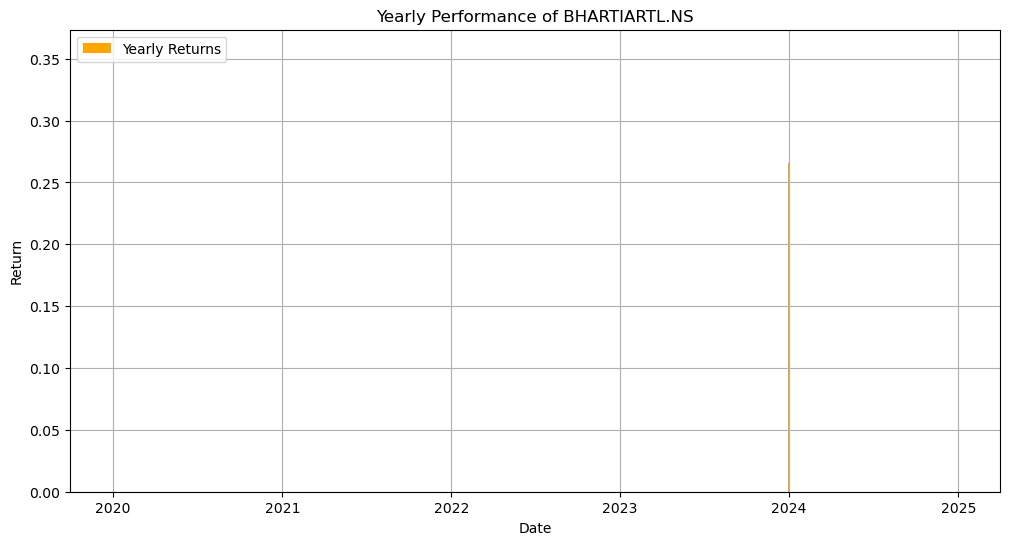

In [63]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/BHARTIARTL.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of BHARTIARTL.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of BHARTIARTL.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for BHARTIARTL.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of BHARTIARTL.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of BHARTIARTL.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [64]:
# 5 --> ICICIBANK.NS

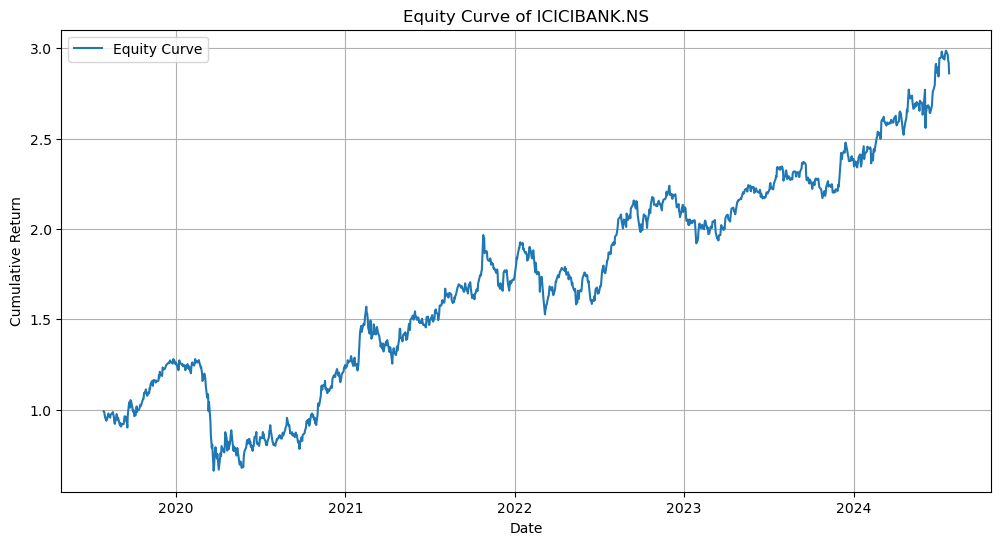

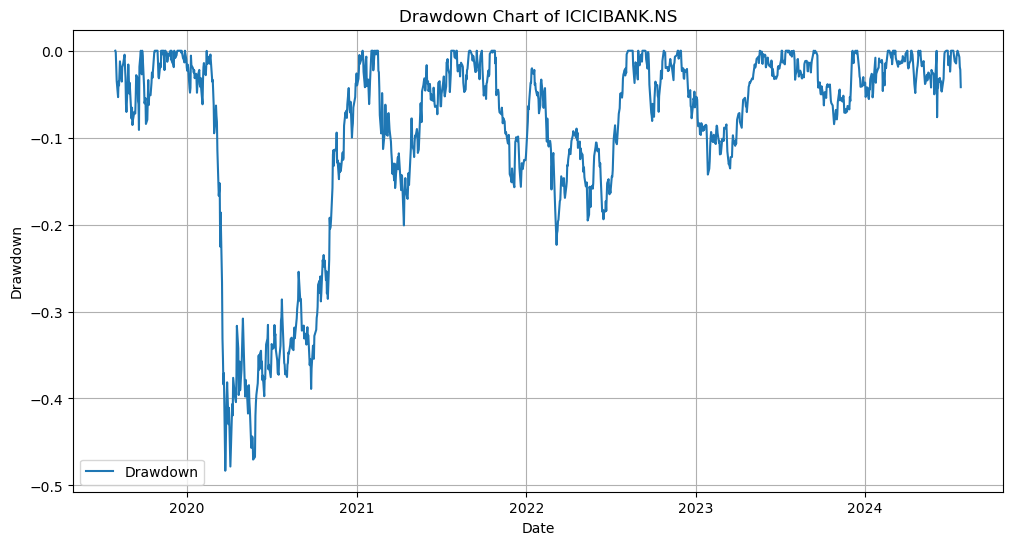

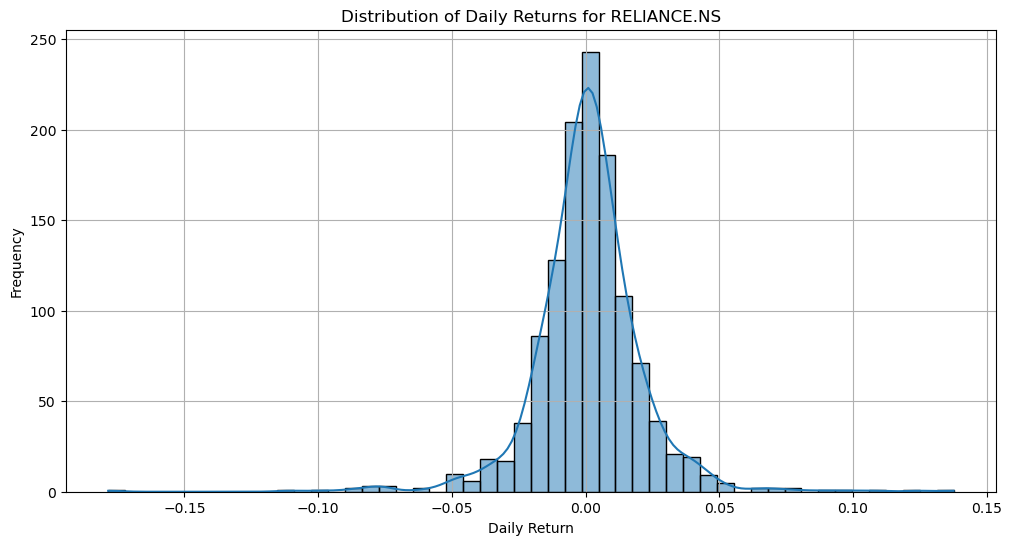

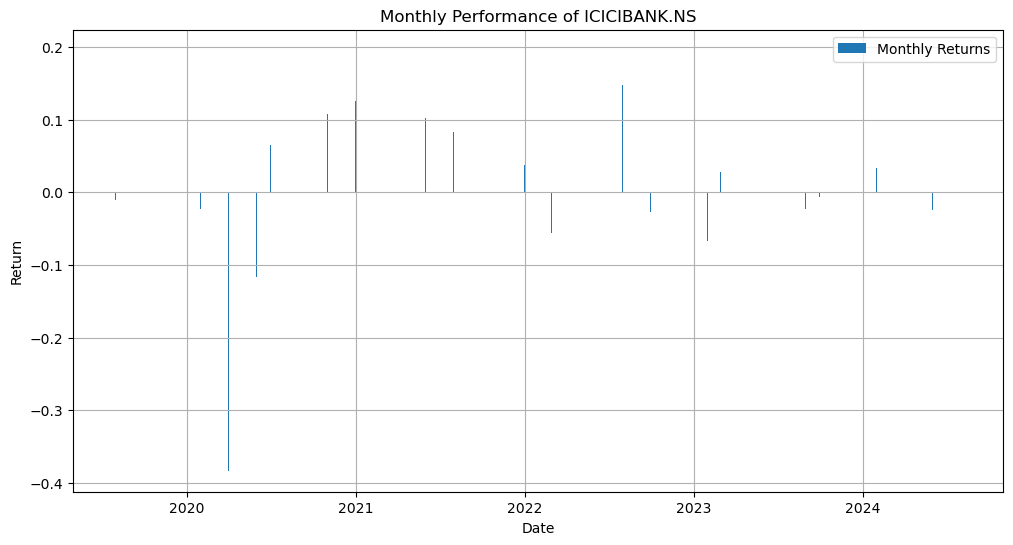

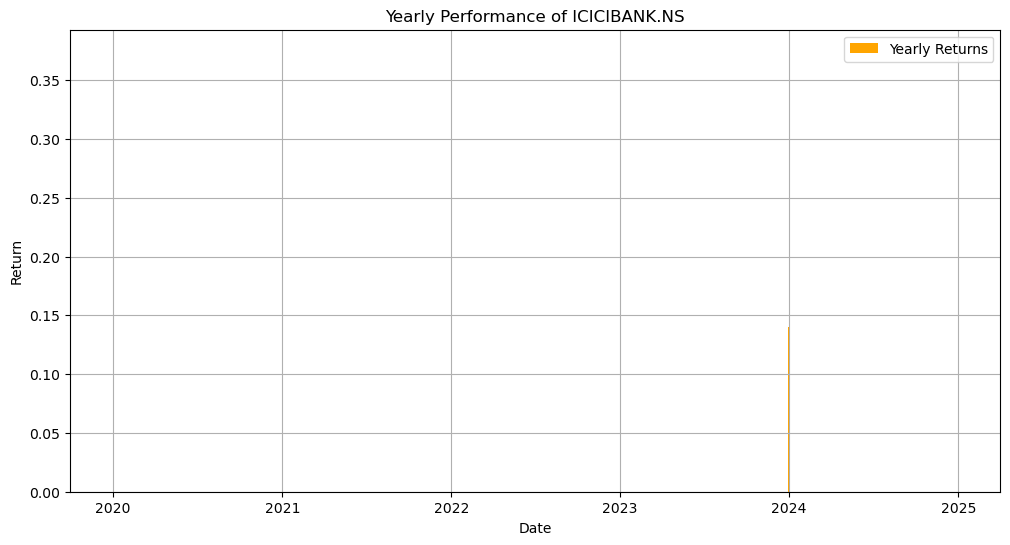

In [65]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/ICICIBANK.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of ICICIBANK.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of ICICIBANK.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for RELIANCE.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of ICICIBANK.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of ICICIBANK.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
# 6 --> SBIN.NS

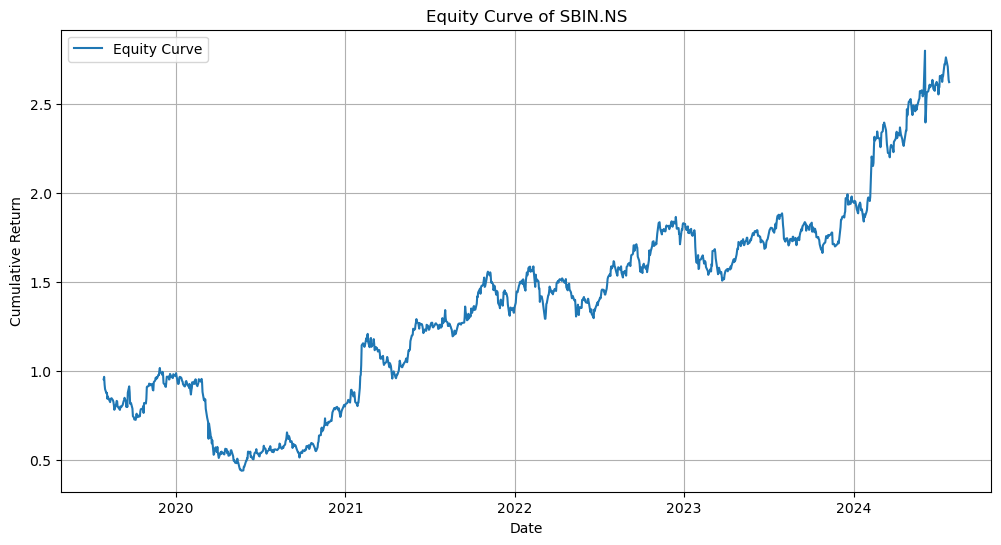

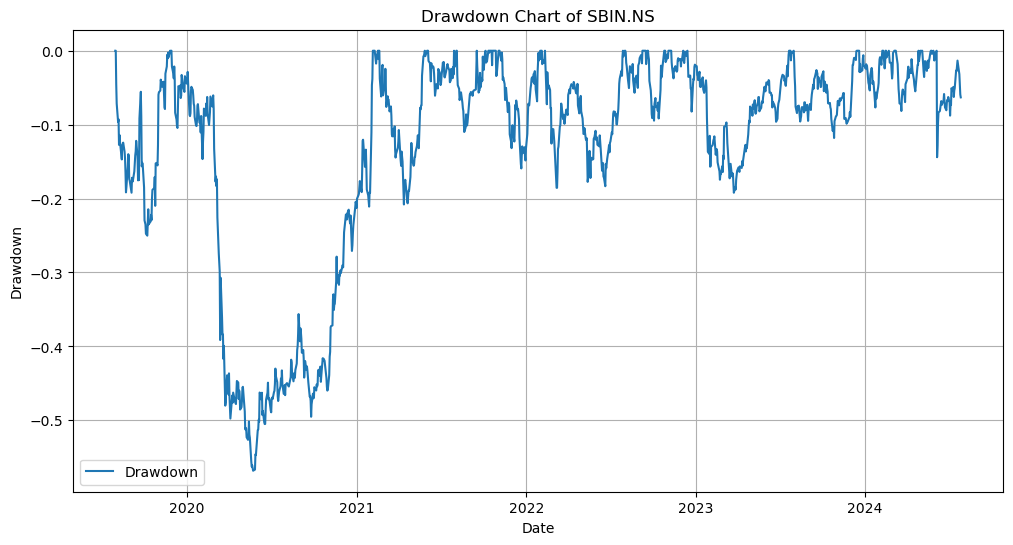

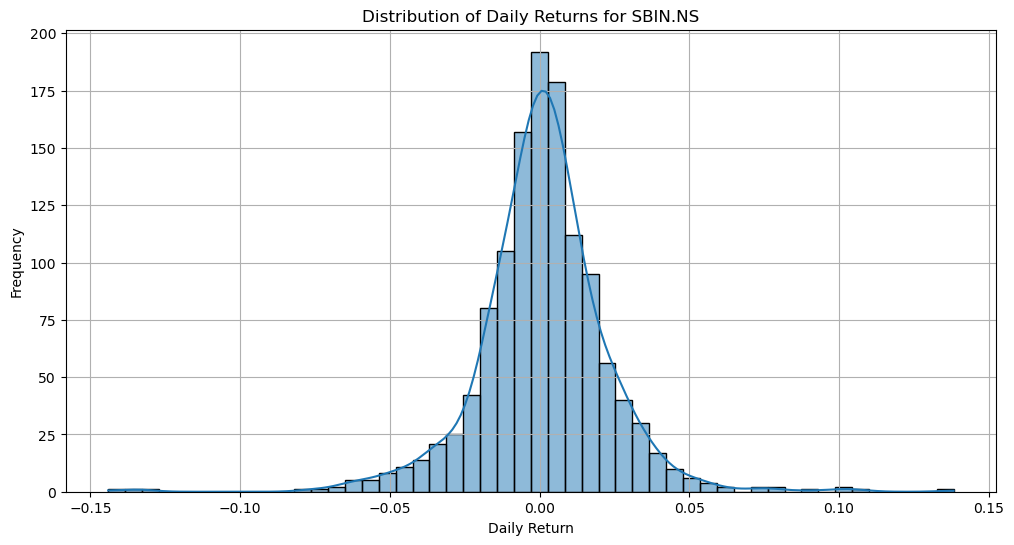

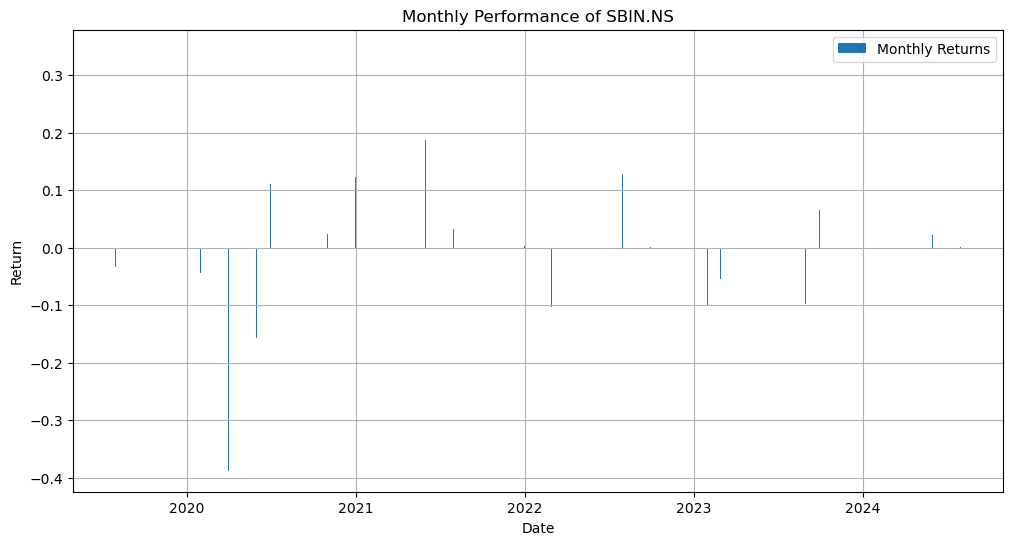

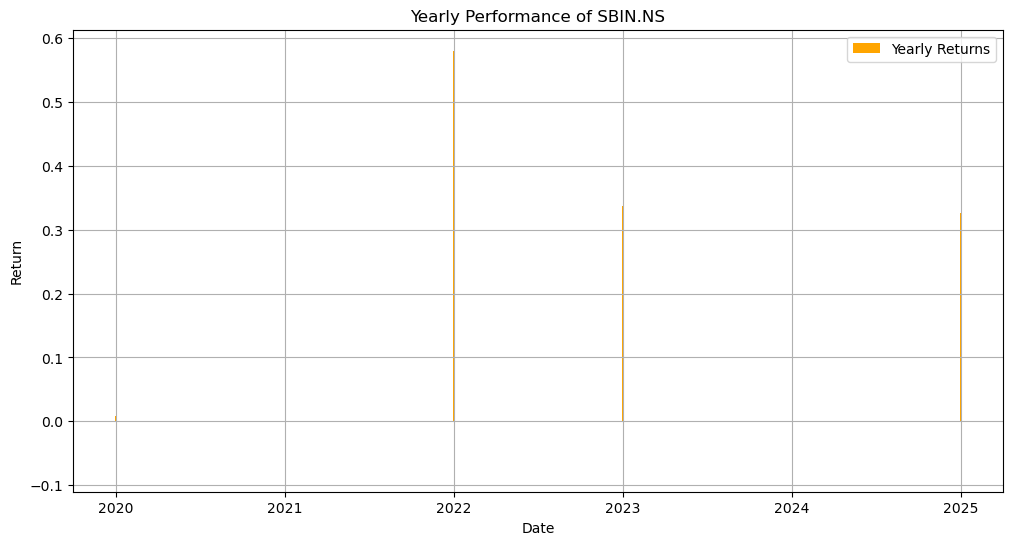

In [67]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/SBIN.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of SBIN.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of SBIN.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for SBIN.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of SBIN.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of SBIN.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
# 7 --> INFY.NS

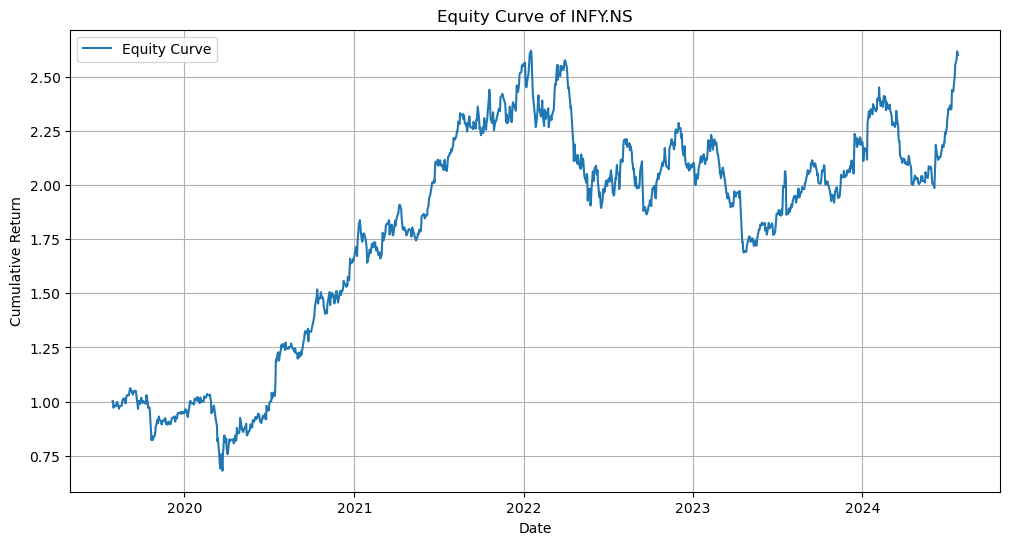

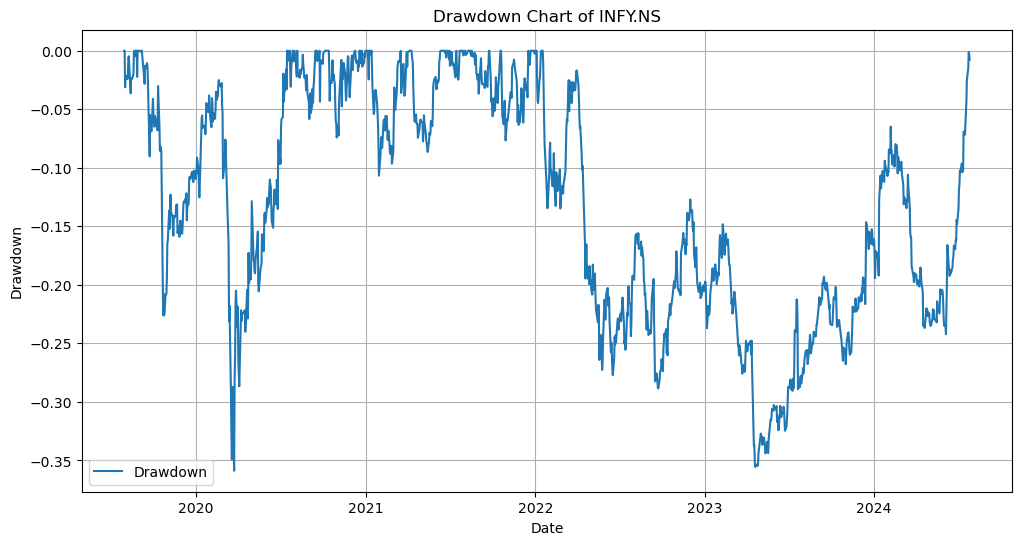

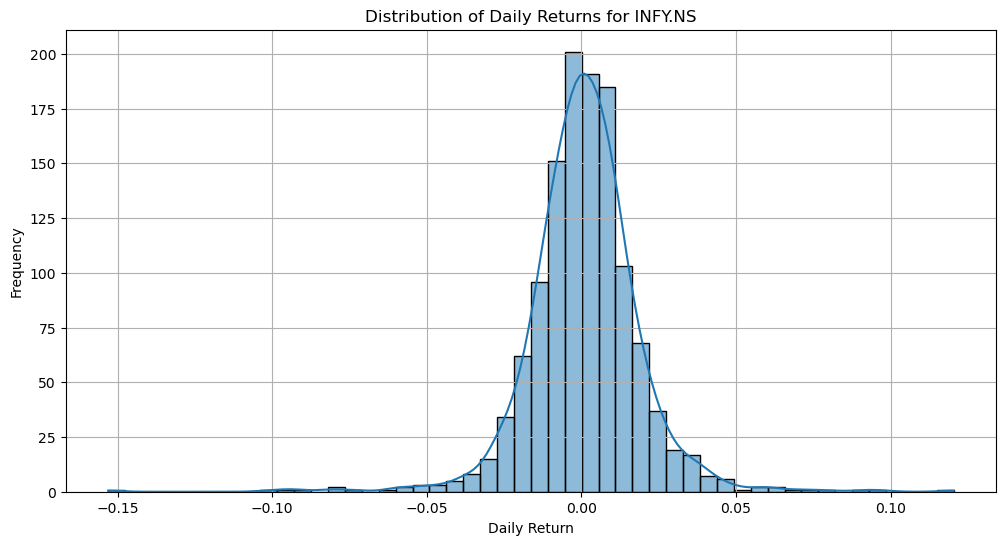

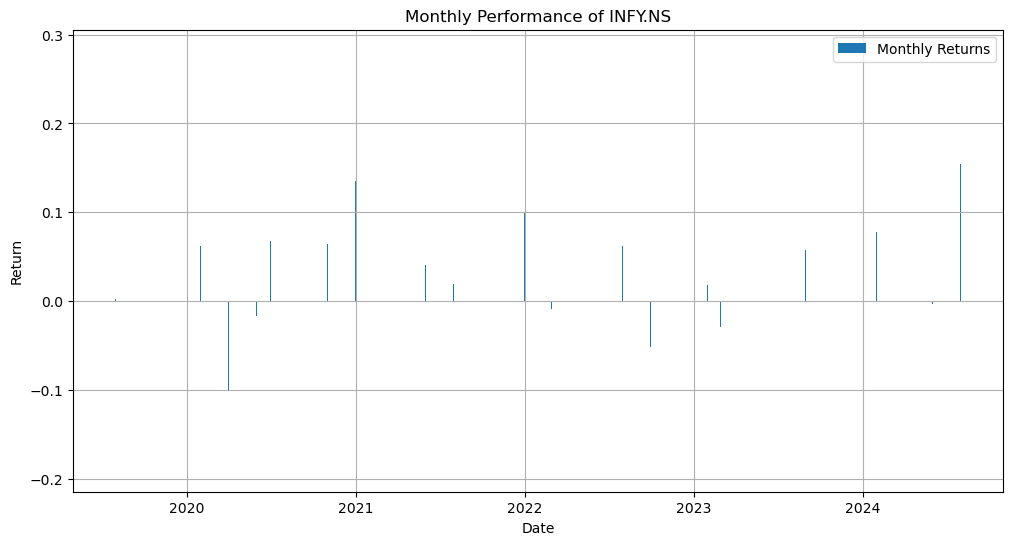

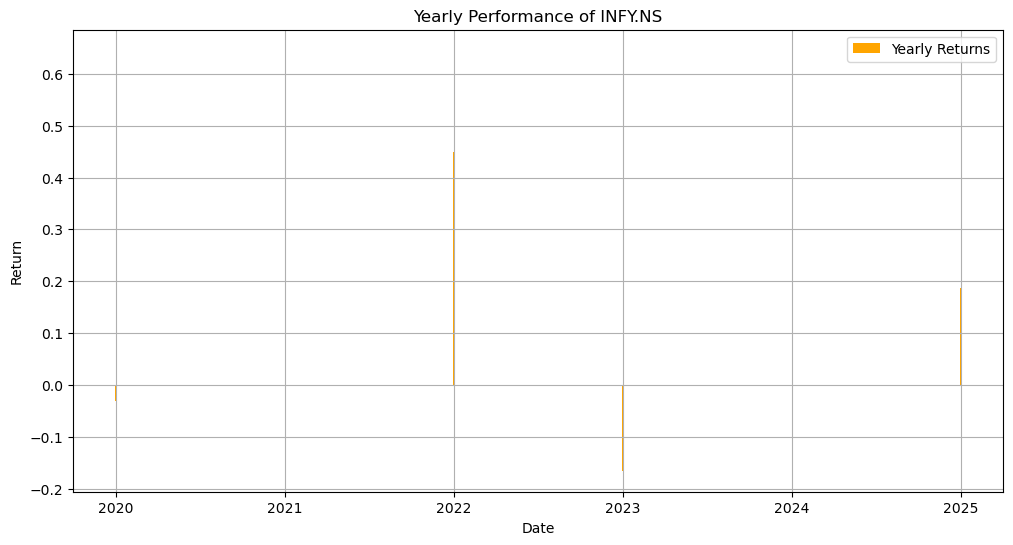

In [69]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/INFY.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of INFY.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of INFY.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for INFY.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of INFY.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of INFY.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
# 8 --> LICI.NS

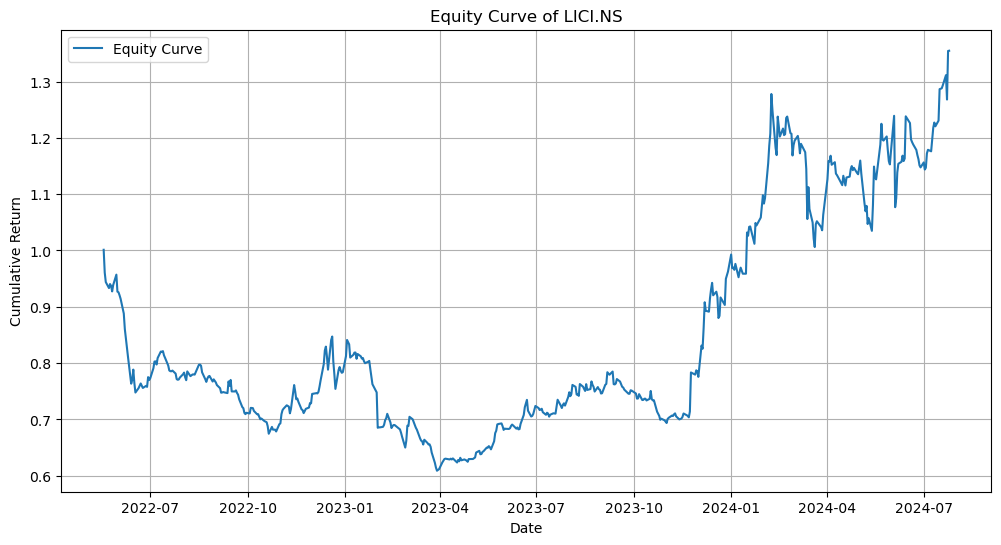

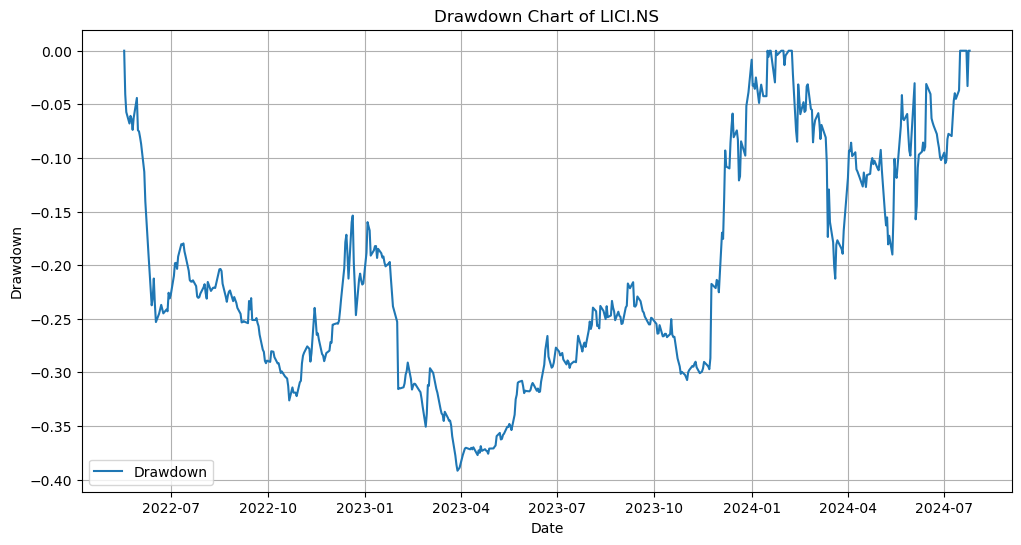

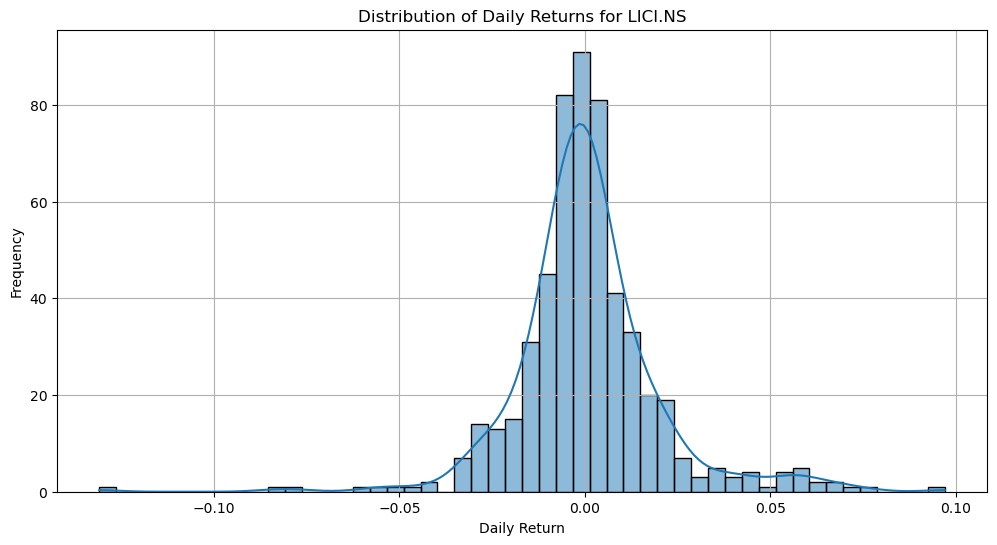

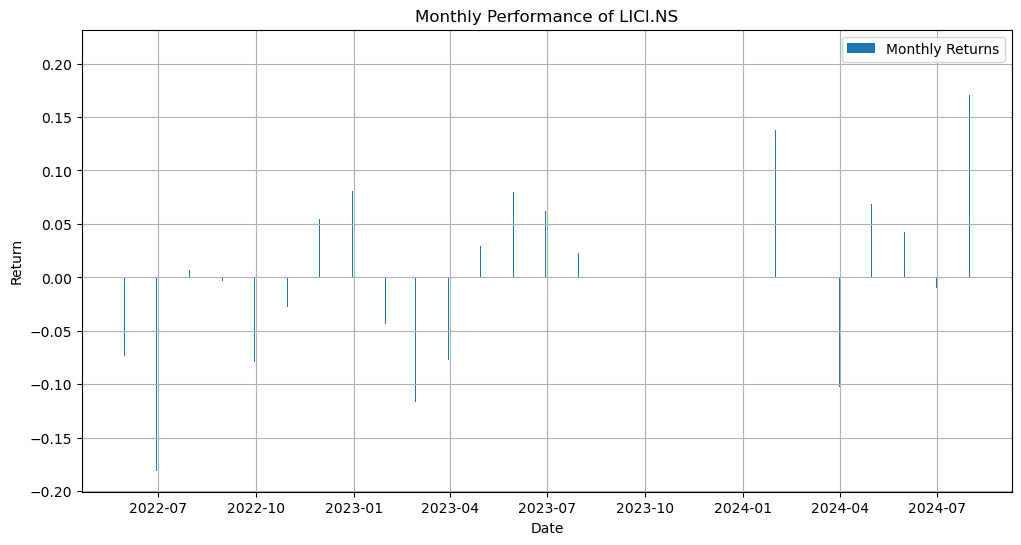

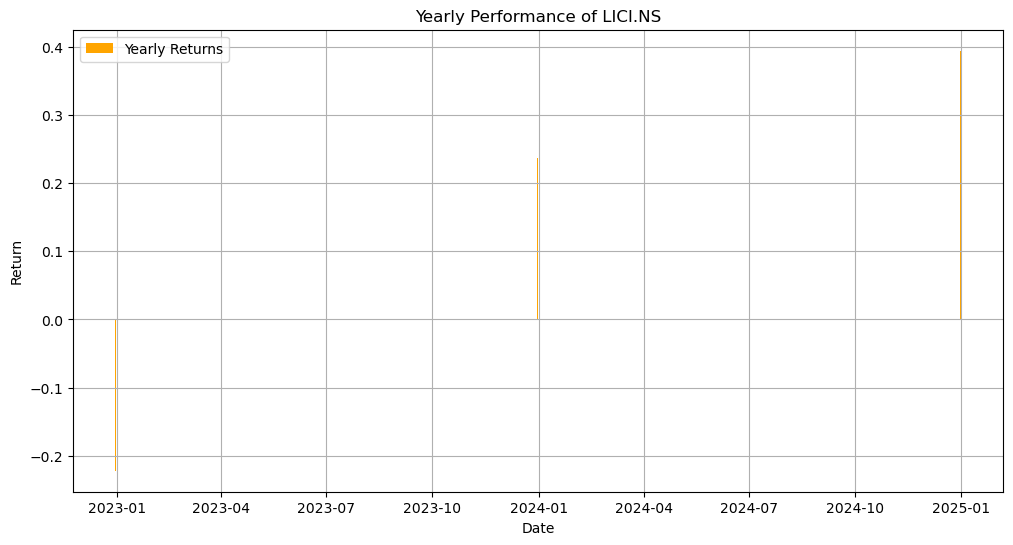

In [71]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/LICI.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of LICI.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of LICI.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for LICI.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of LICI.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of LICI.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [72]:
# 9 --> HINDUNILVR.NS

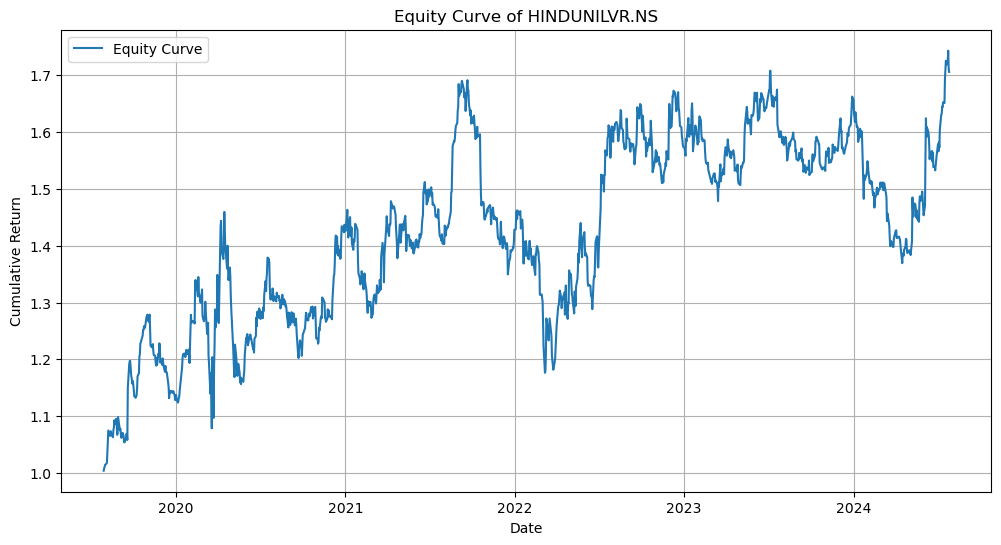

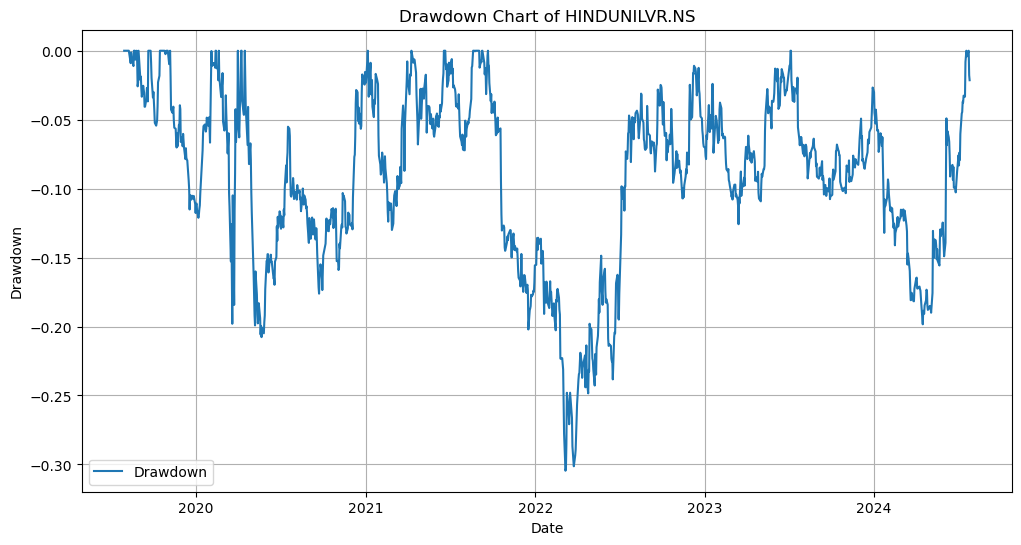

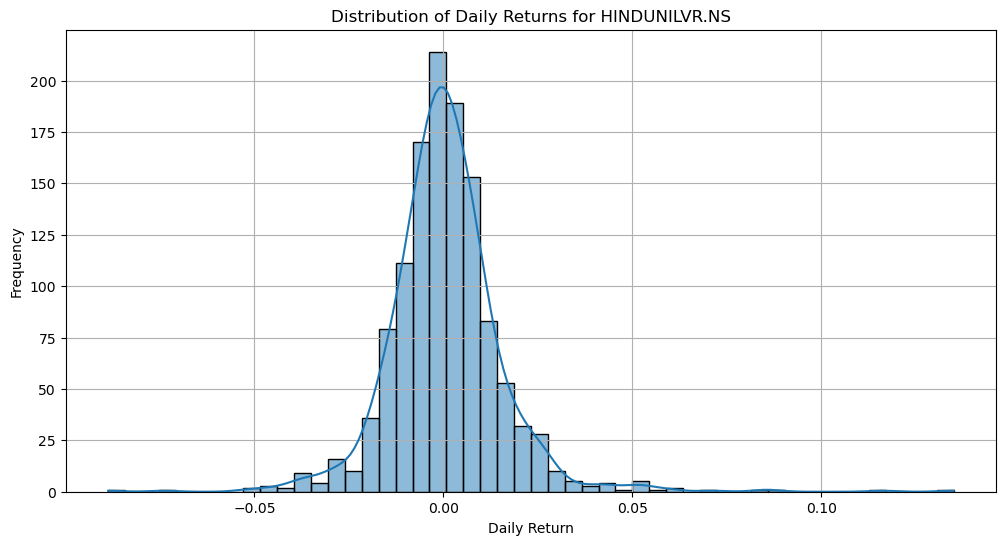

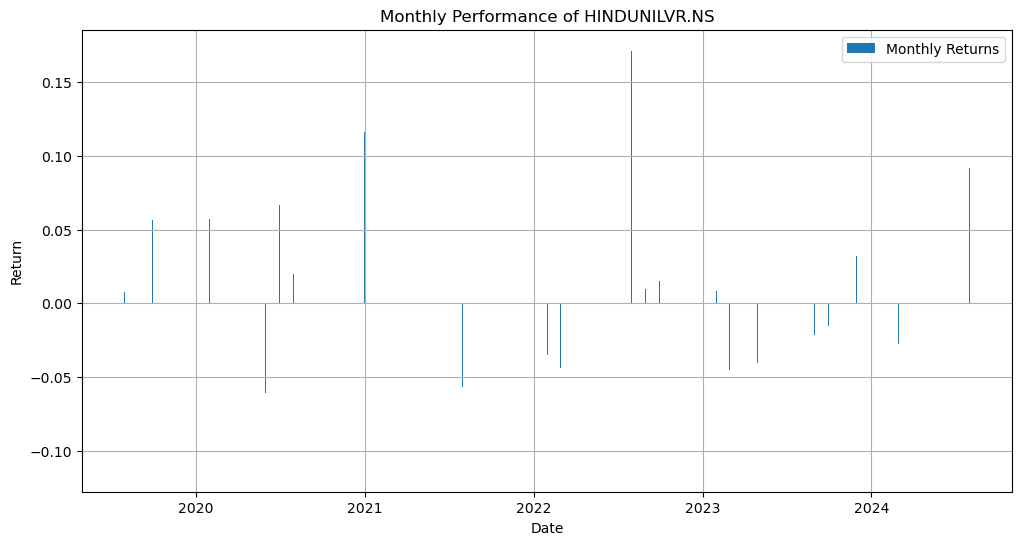

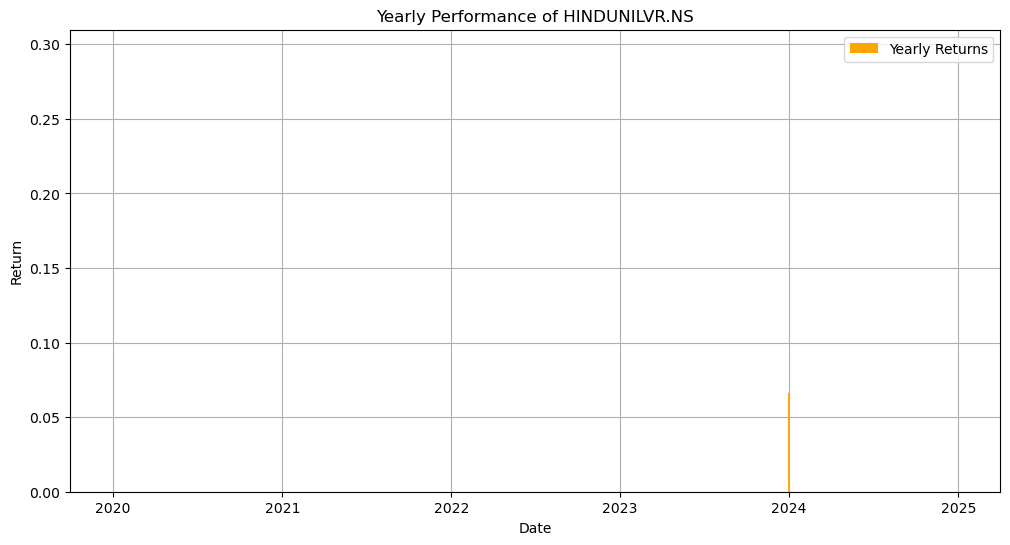

In [73]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/HINDUNILVR.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of HINDUNILVR.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of HINDUNILVR.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for HINDUNILVR.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of HINDUNILVR.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of HINDUNILVR.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [74]:
# 10 --> ITC.NS

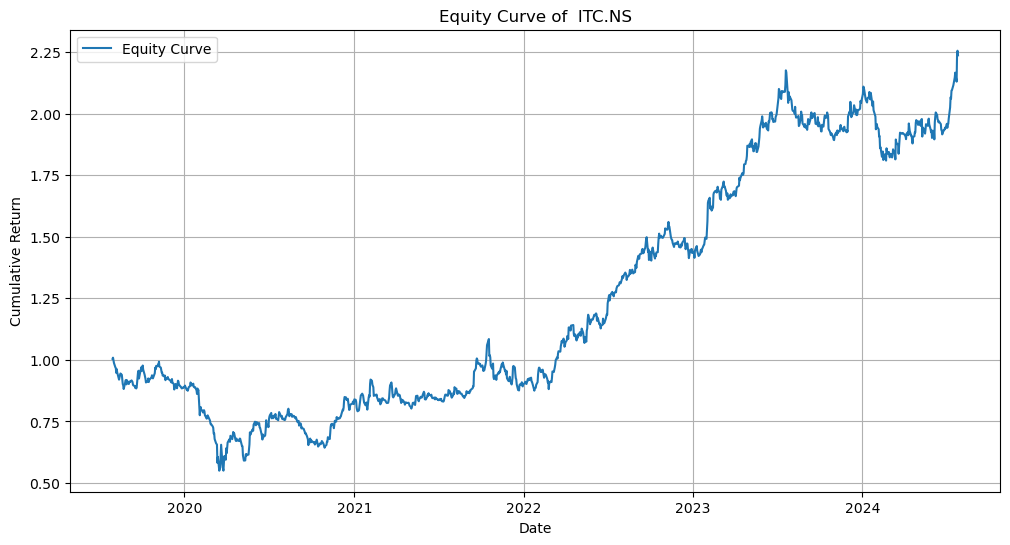

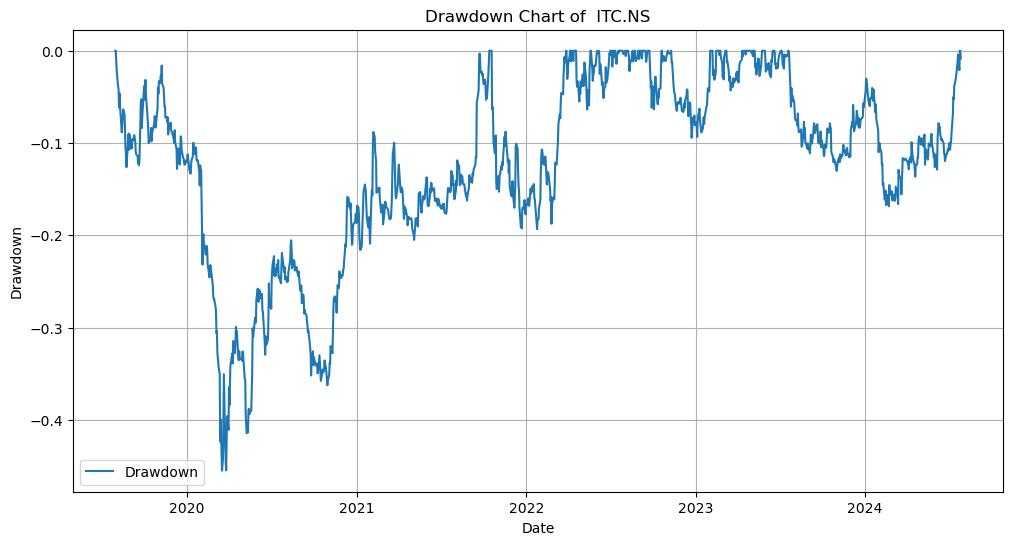

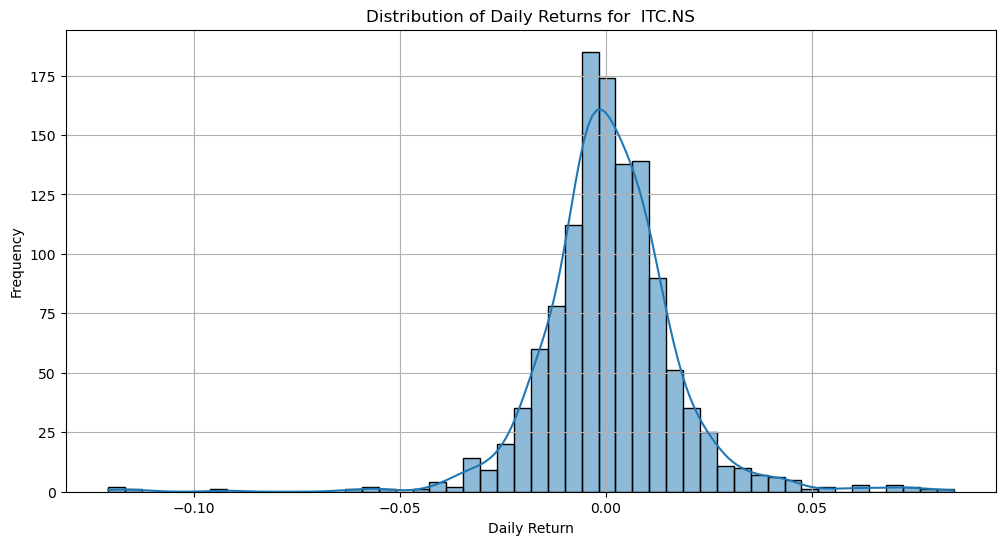

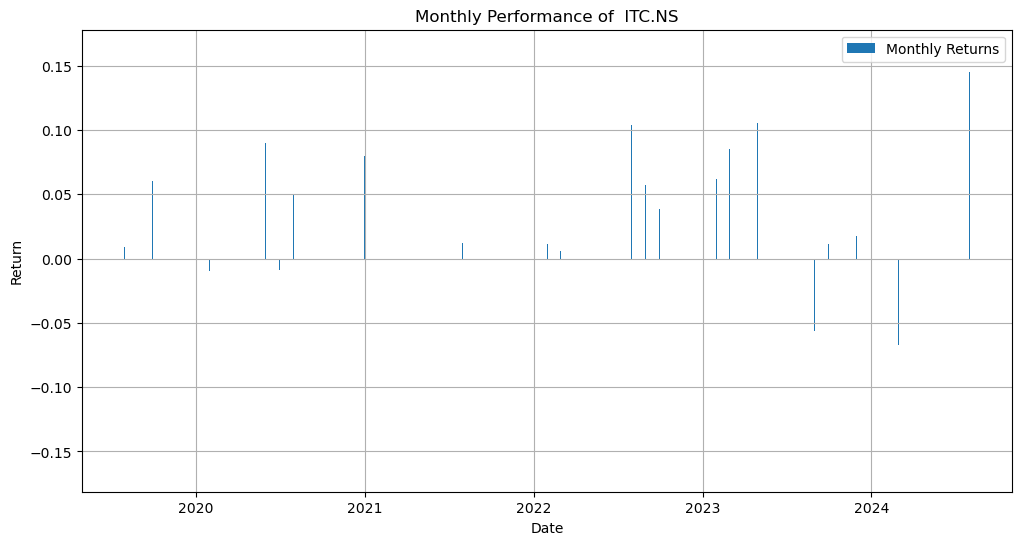

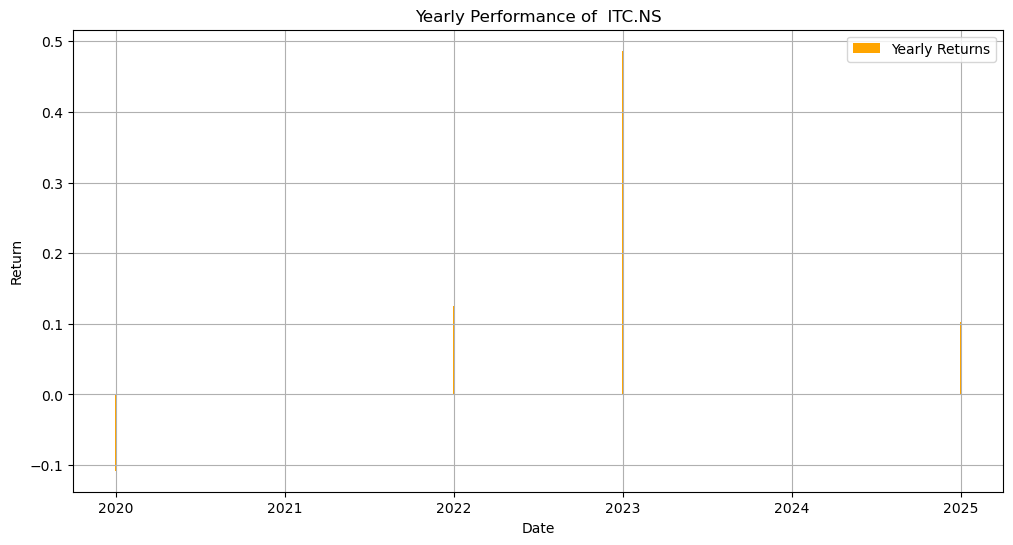

In [75]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/ITC.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of  ITC.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of  ITC.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for  ITC.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of  ITC.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of  ITC.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [76]:
# 11 --> LT.NS

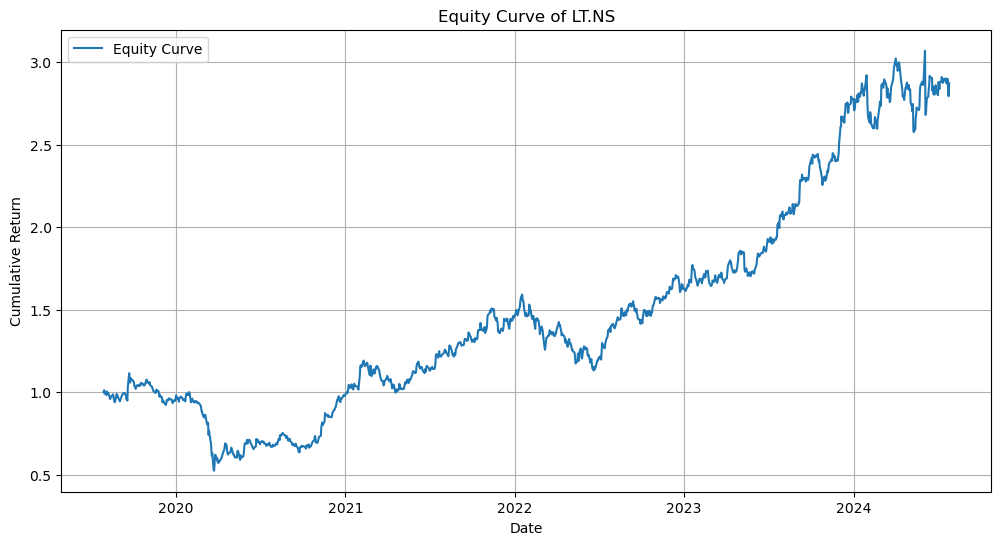

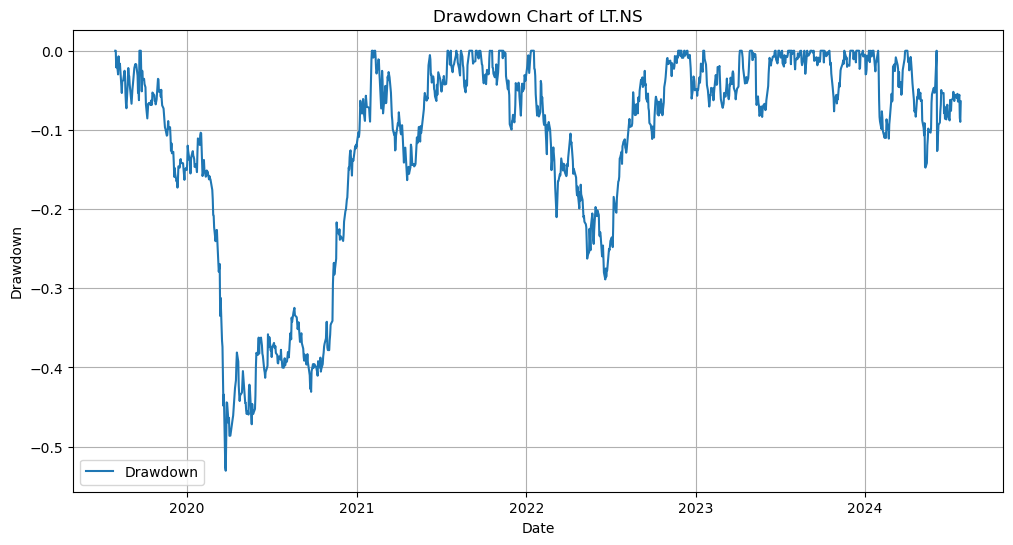

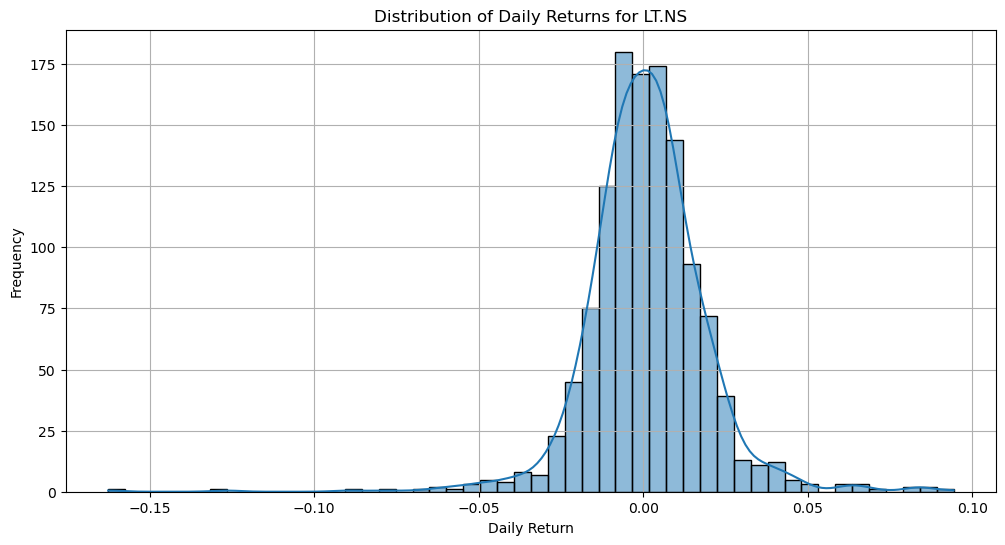

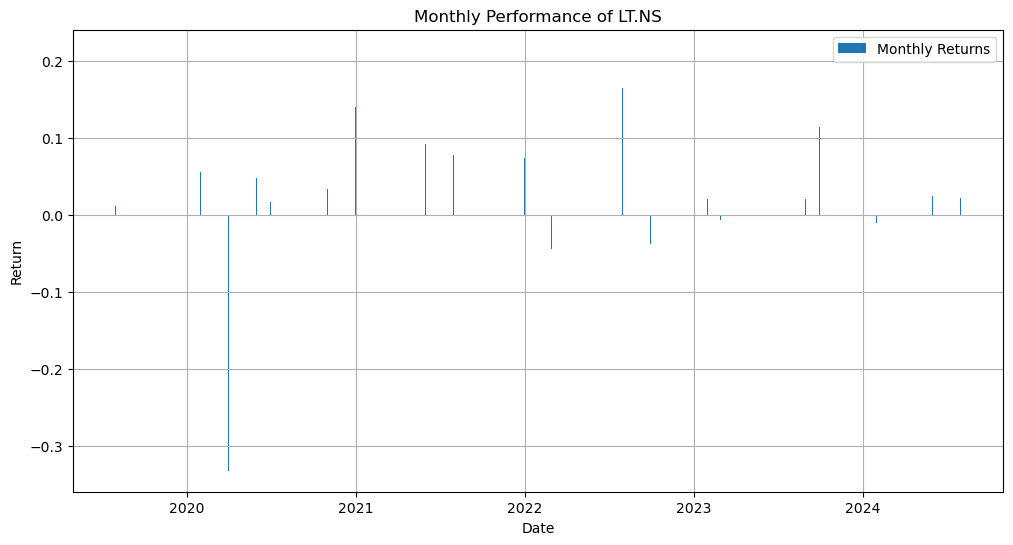

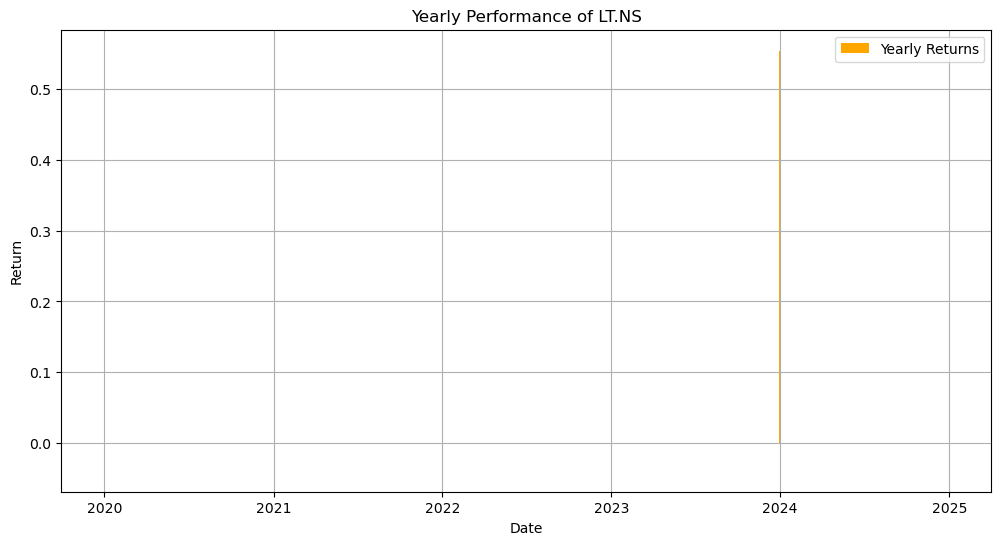

In [77]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/LT.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of LT.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of LT.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for LT.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of LT.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of LT.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [78]:
# 12 --> HCLTECH.NS

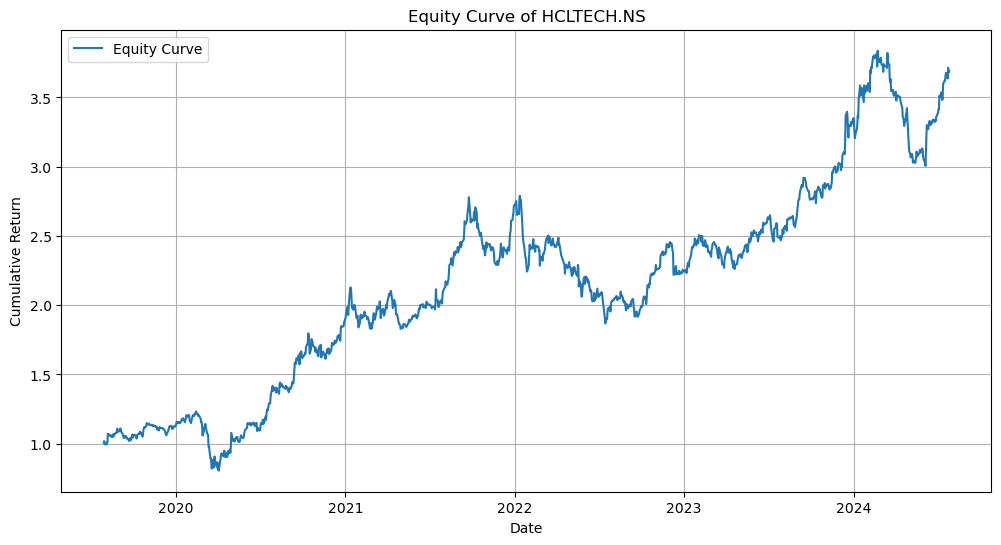

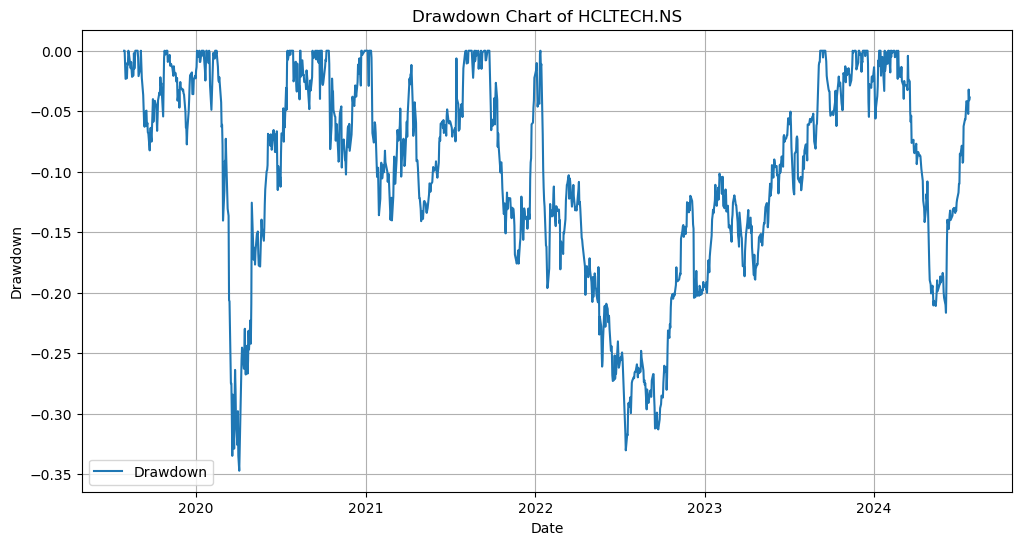

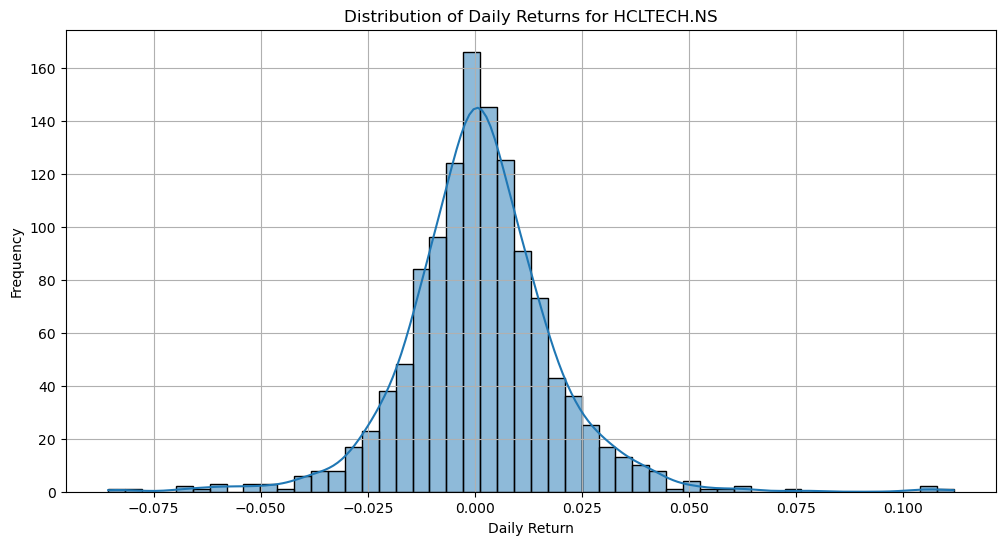

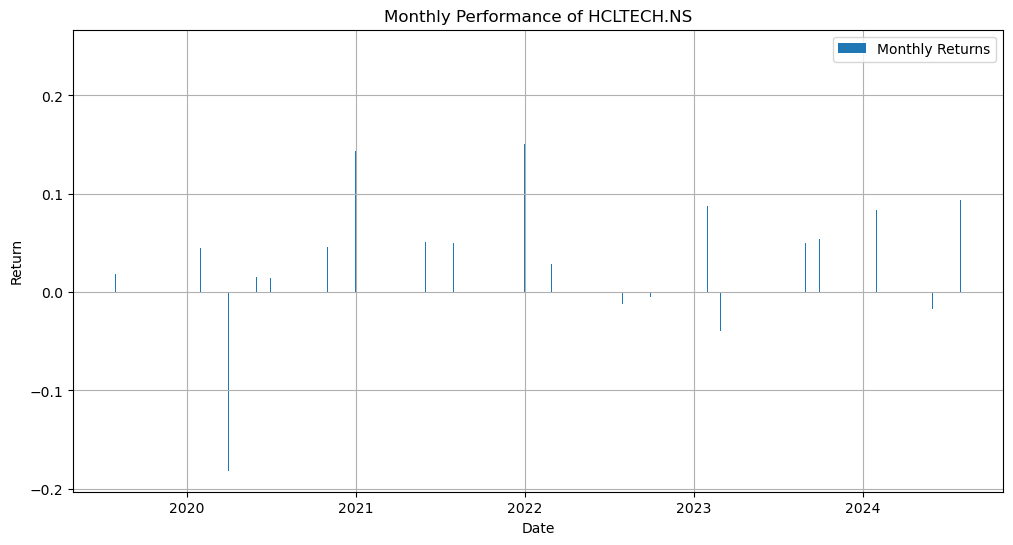

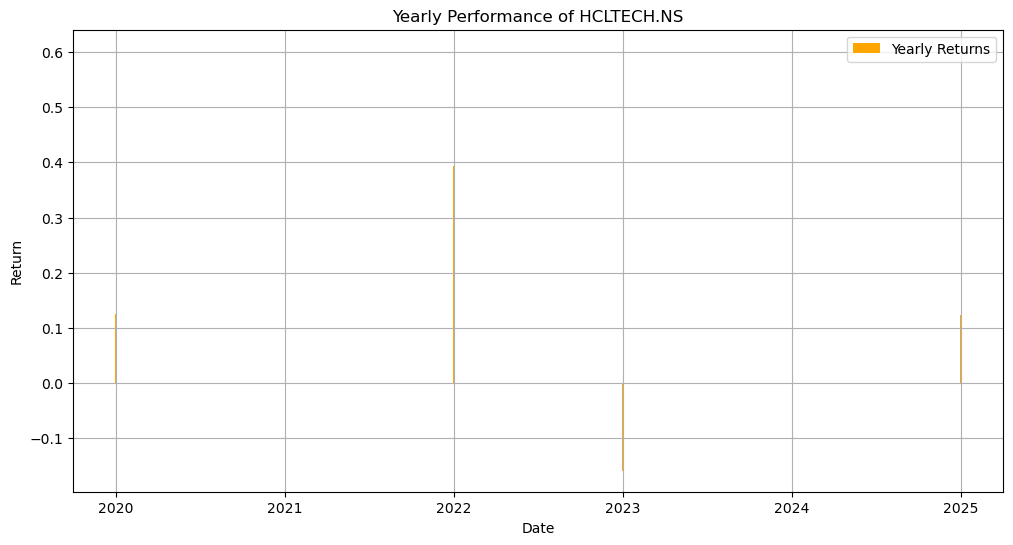

In [79]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/HCLTECH.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of HCLTECH.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of HCLTECH.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for HCLTECH.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of HCLTECH.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of HCLTECH.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [80]:
# 13 --> ONGC.NS

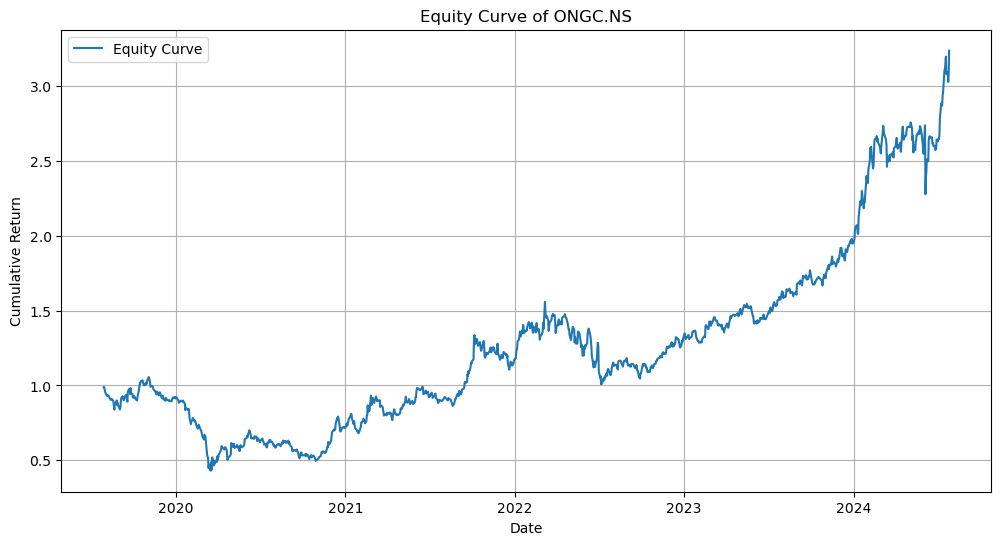

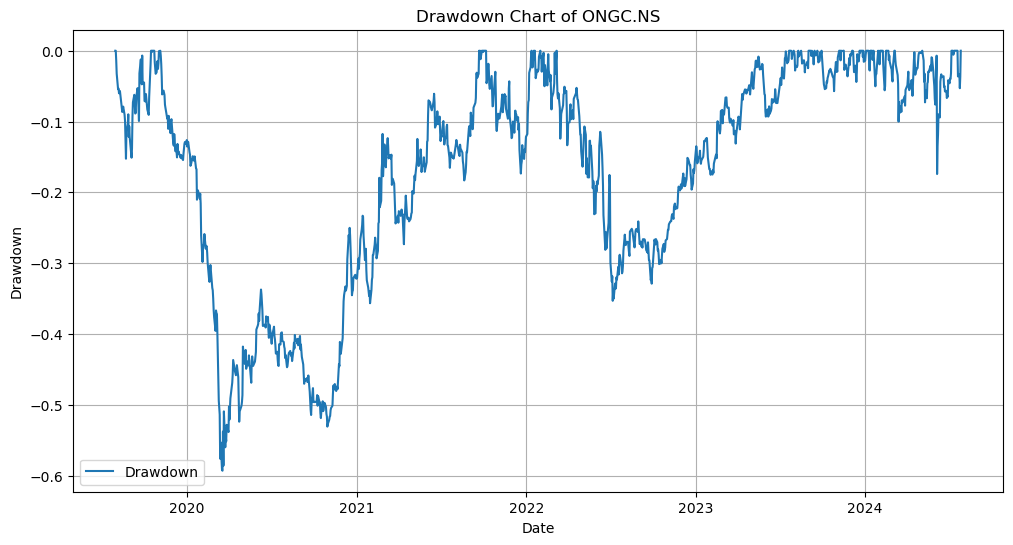

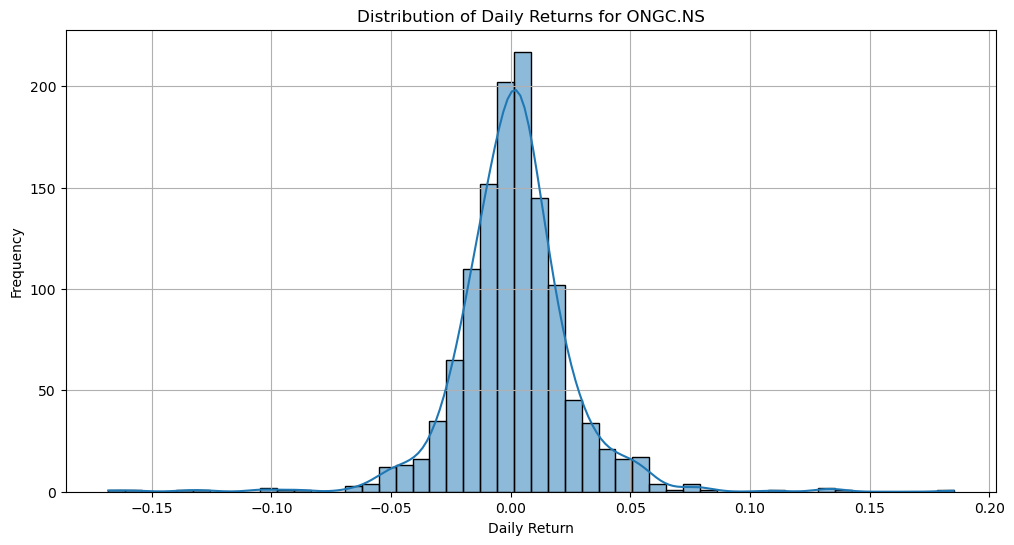

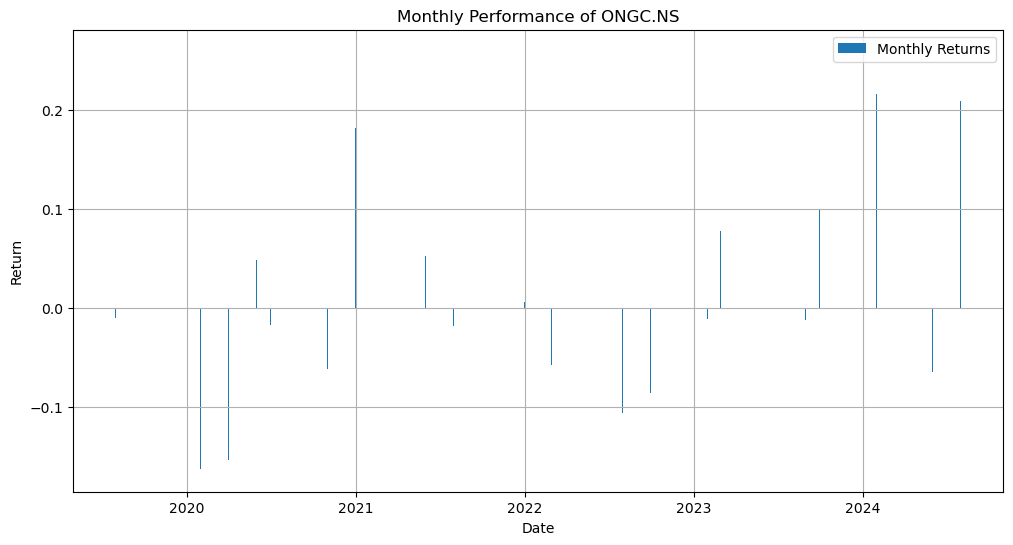

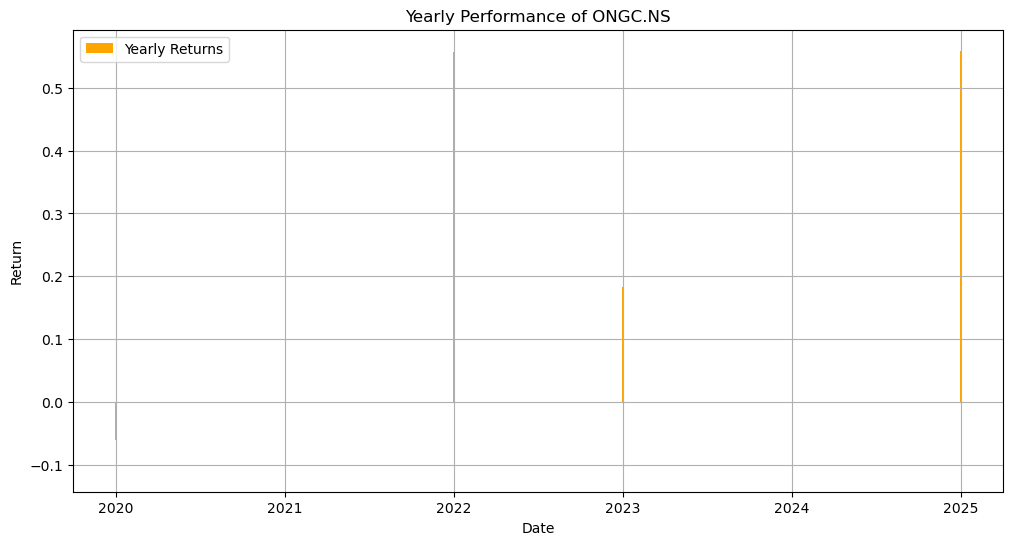

In [81]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/ONGC.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of ONGC.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of ONGC.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for ONGC.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of ONGC.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of ONGC.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [82]:
# 14 --> BAJFINANCE.NS

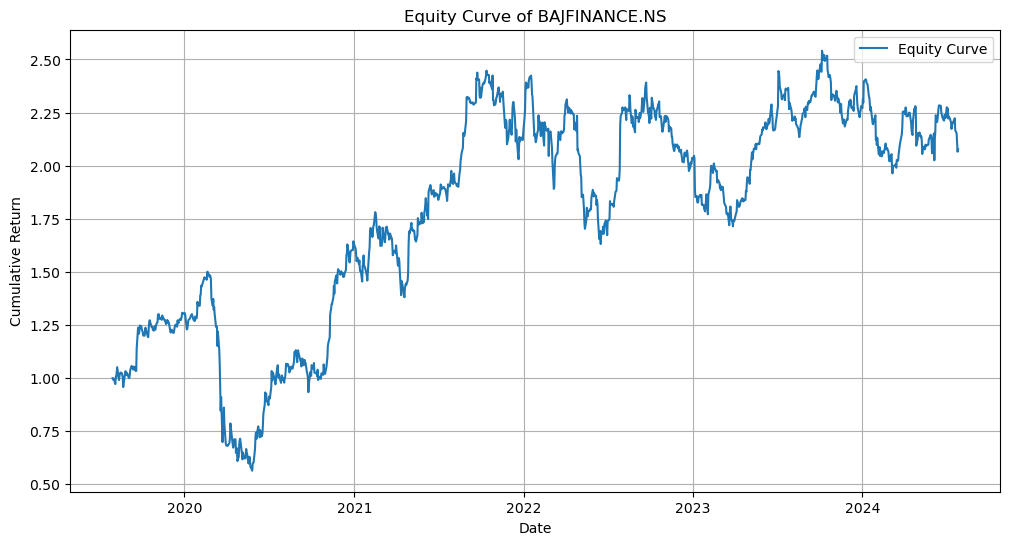

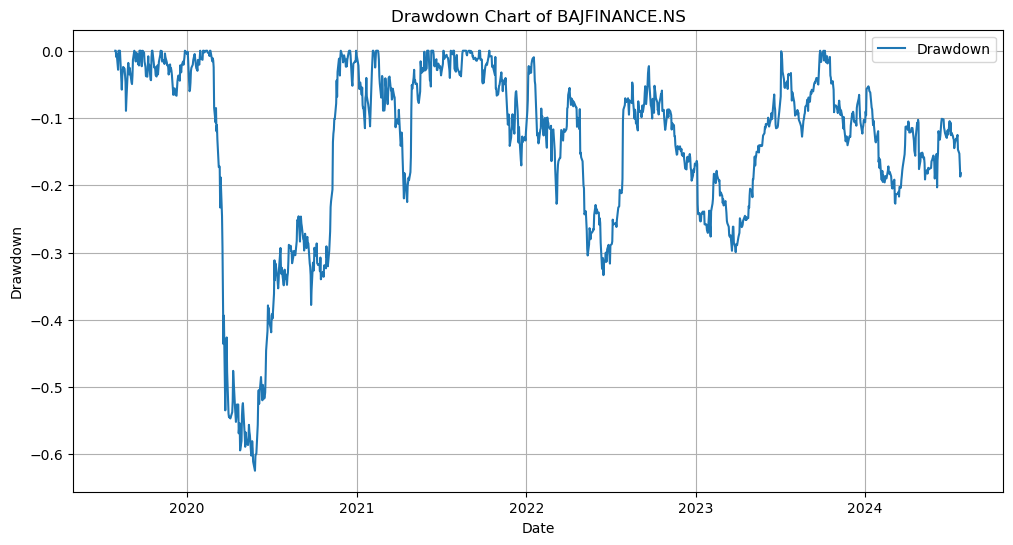

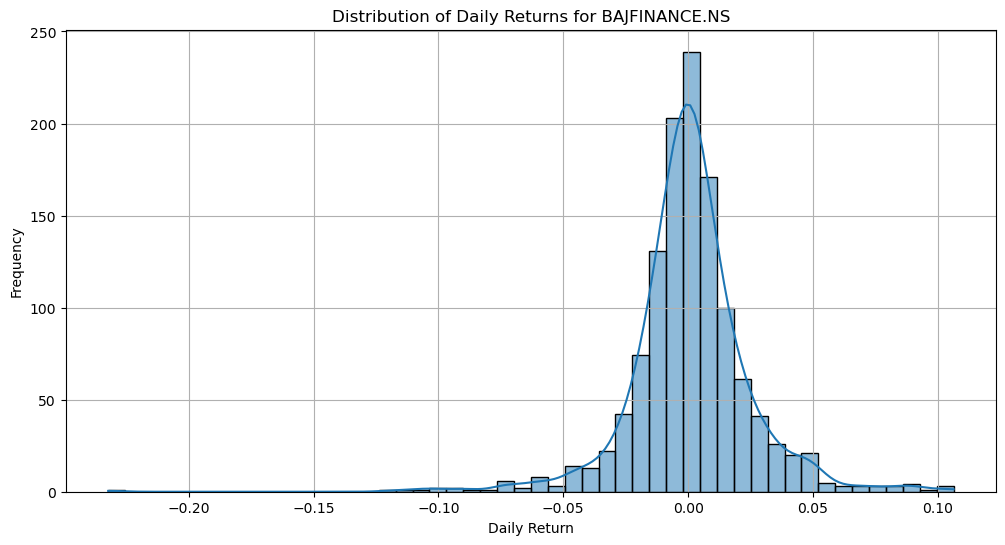

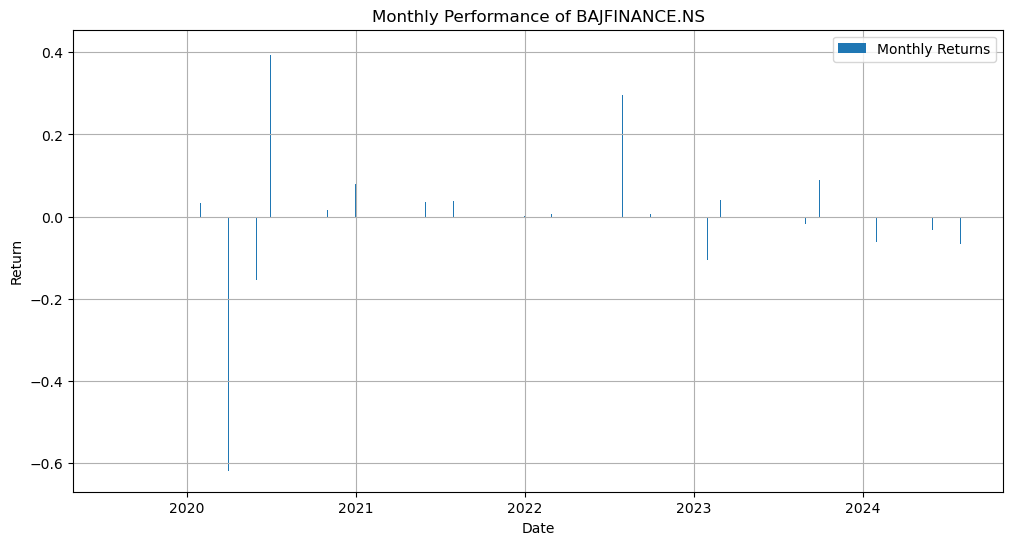

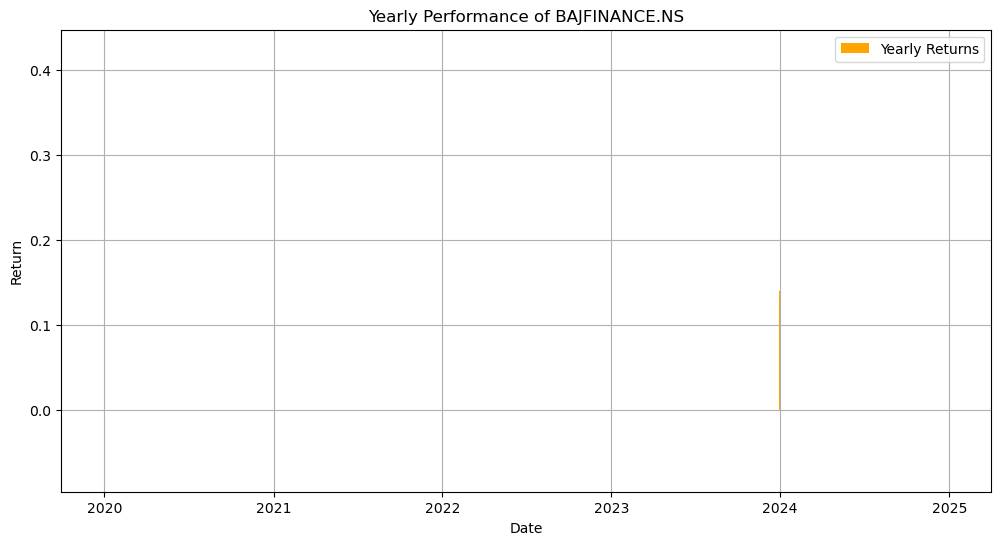

In [83]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/BAJFINANCE.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of BAJFINANCE.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of BAJFINANCE.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for BAJFINANCE.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of BAJFINANCE.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of BAJFINANCE.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [84]:
# 15 --> TATAMOTORS.NS

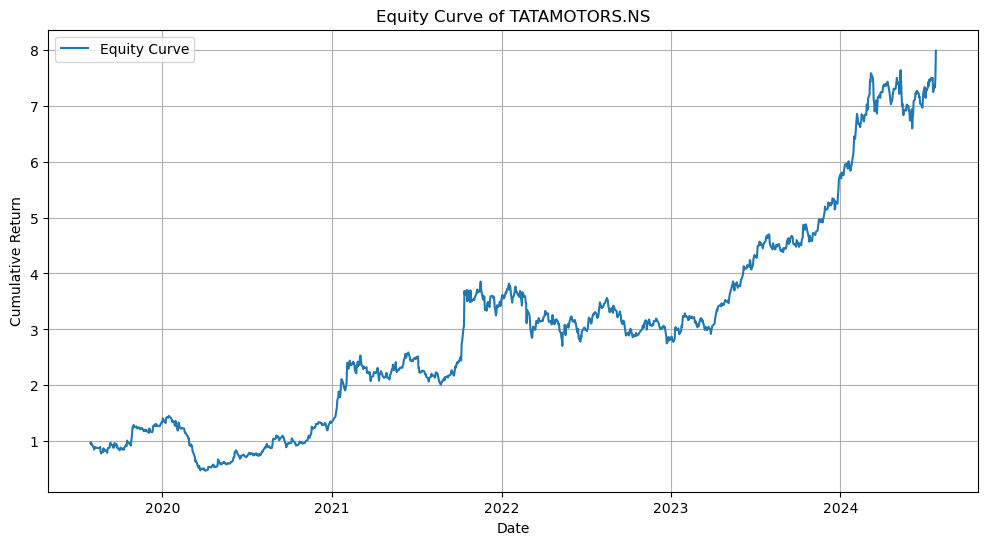

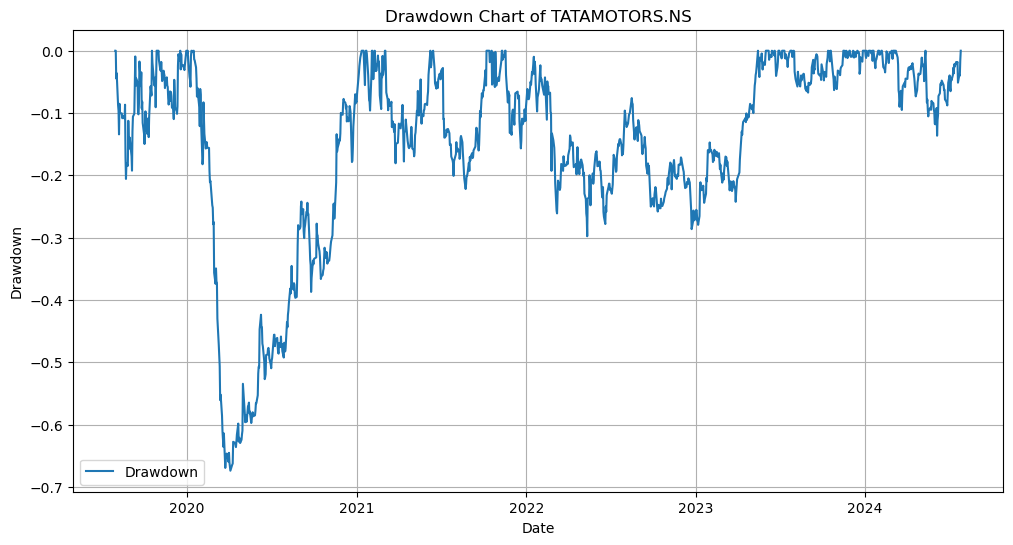

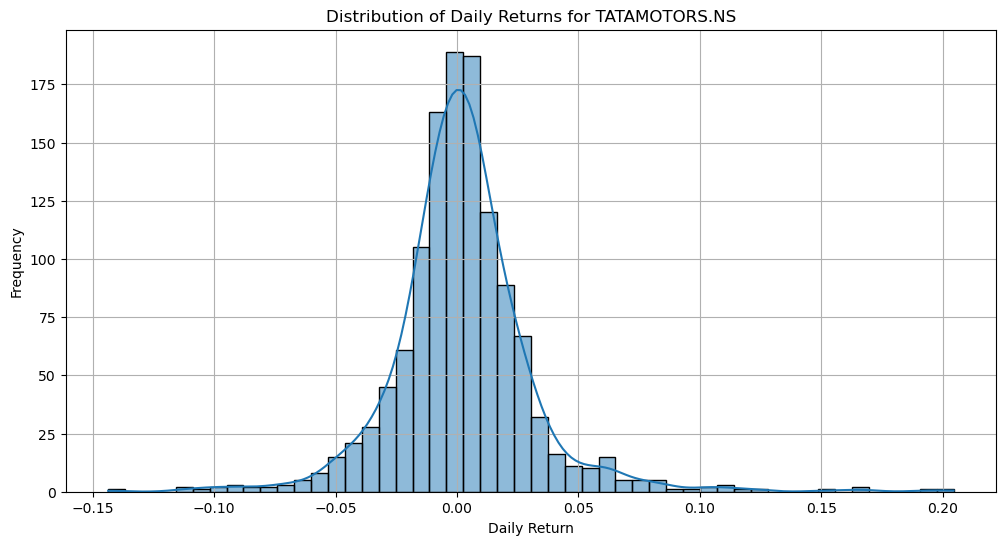

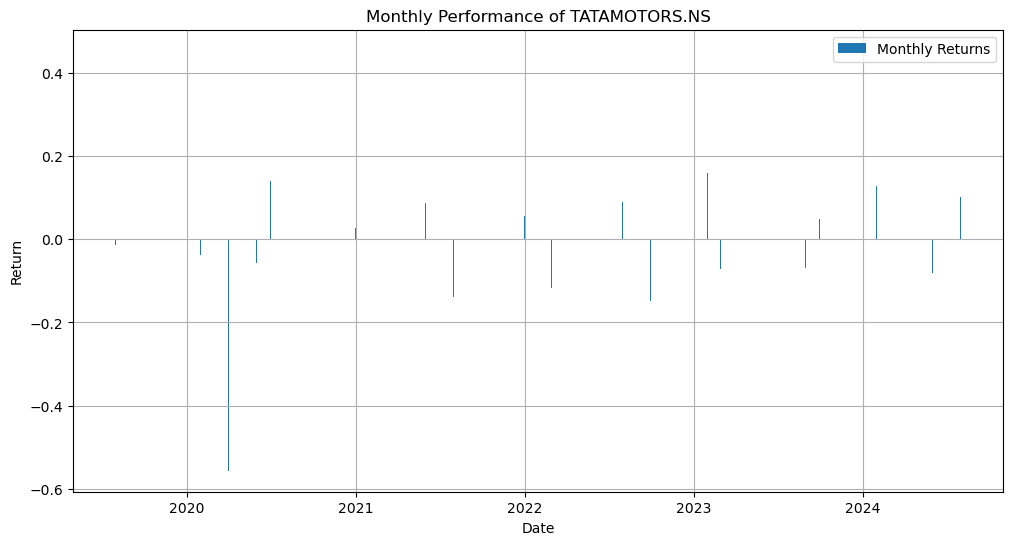

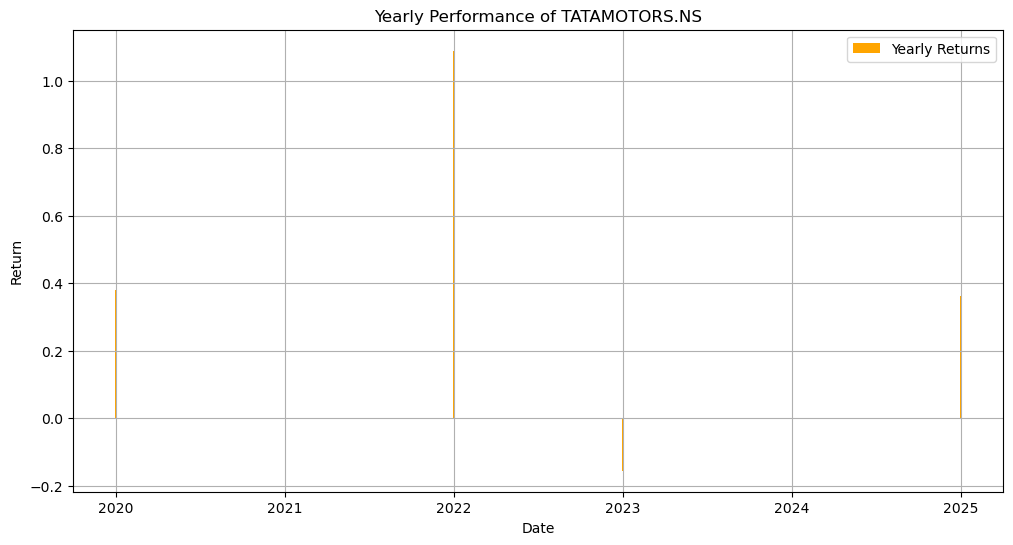

In [85]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/TATAMOTORS.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of TATAMOTORS.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of TATAMOTORS.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for TATAMOTORS.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of TATAMOTORS.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of TATAMOTORS.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [86]:
# 16 --> SUNPHARMA.NS

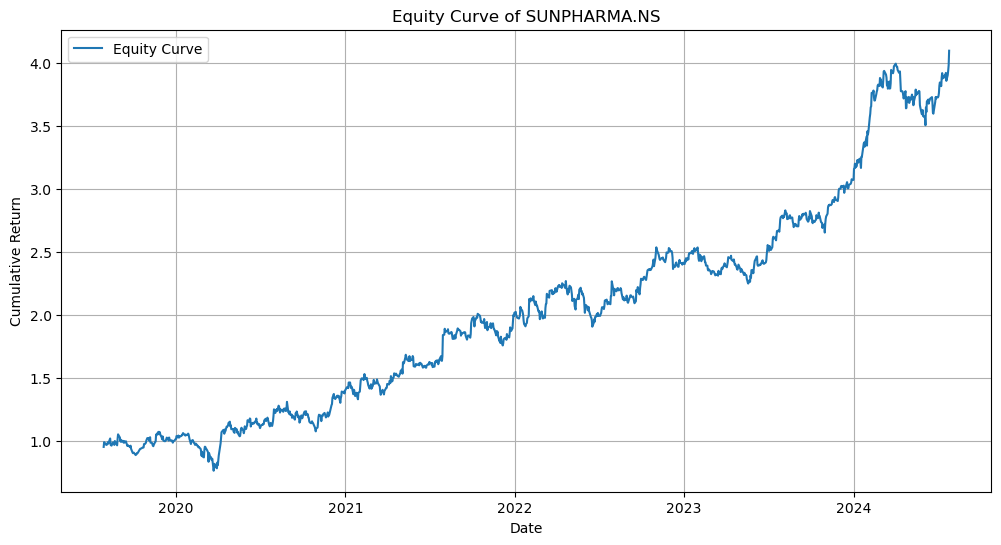

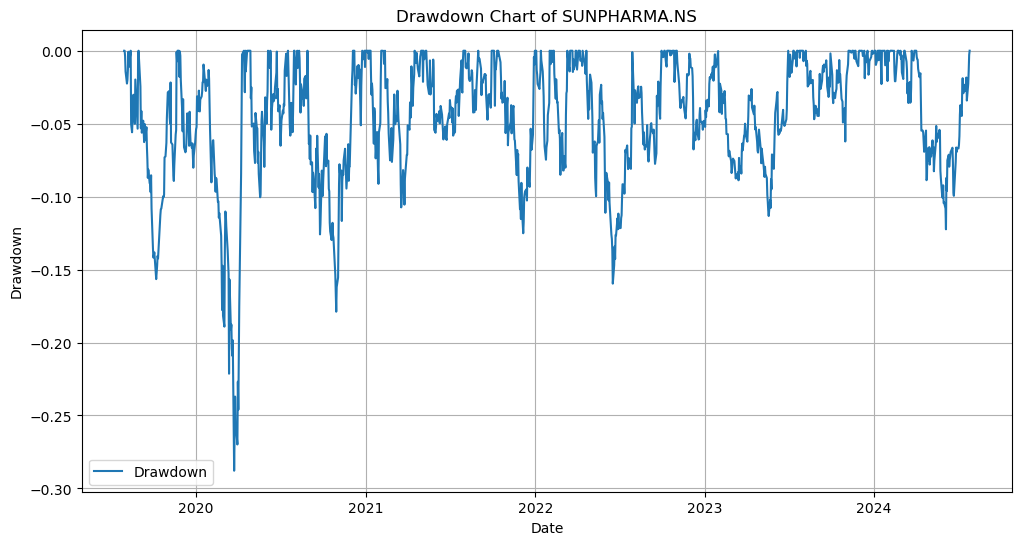

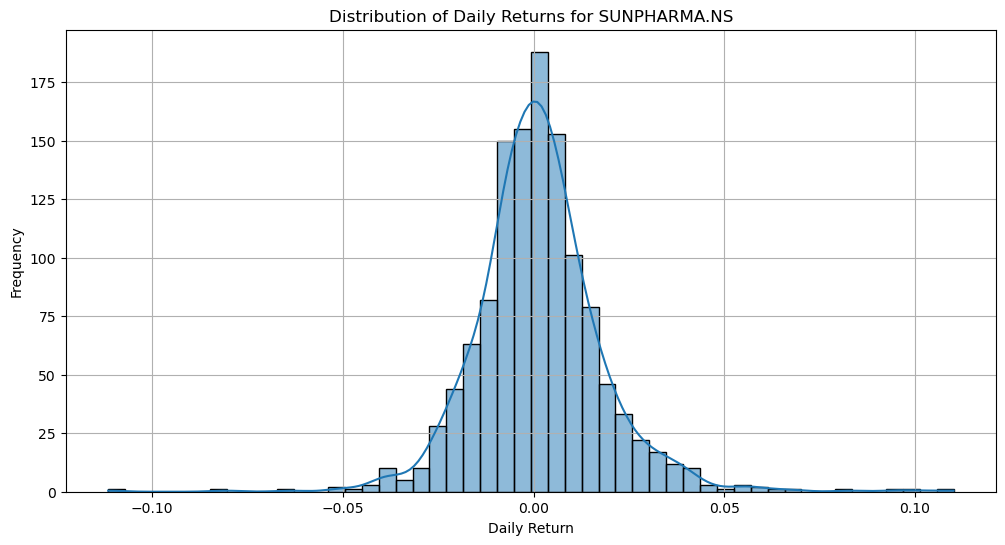

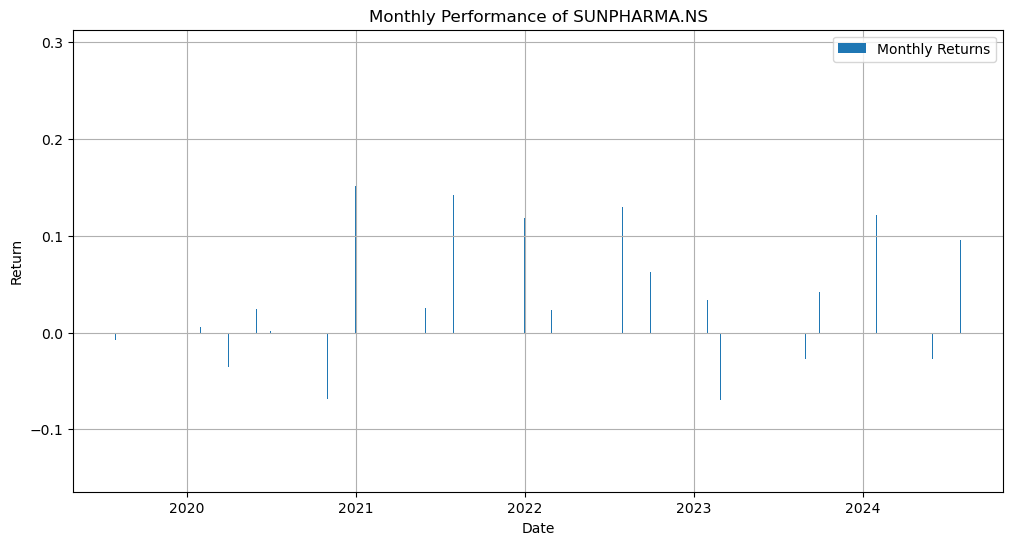

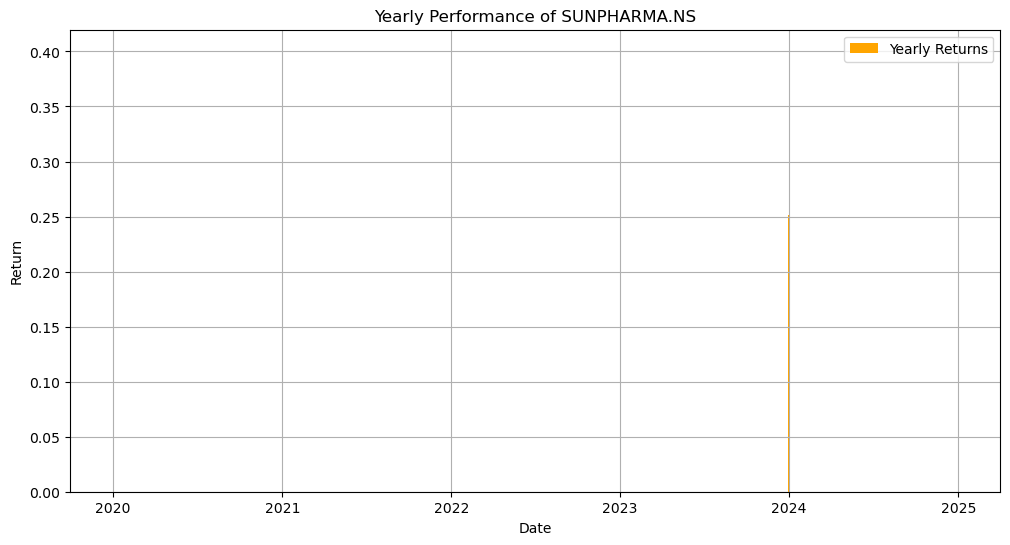

In [87]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/SUNPHARMA.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of SUNPHARMA.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of SUNPHARMA.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for SUNPHARMA.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of SUNPHARMA.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of SUNPHARMA.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [88]:
# 17 --> MARUTI.NS

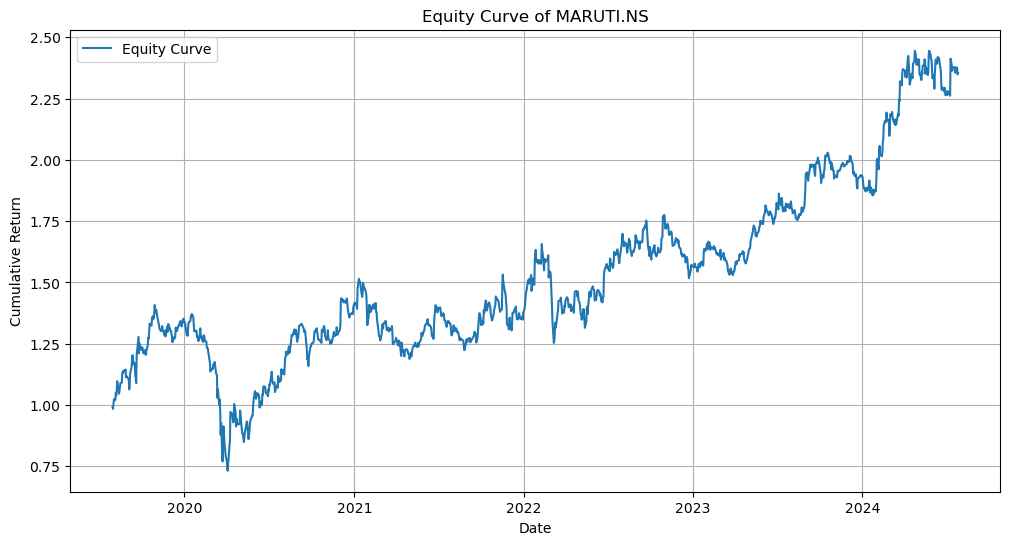

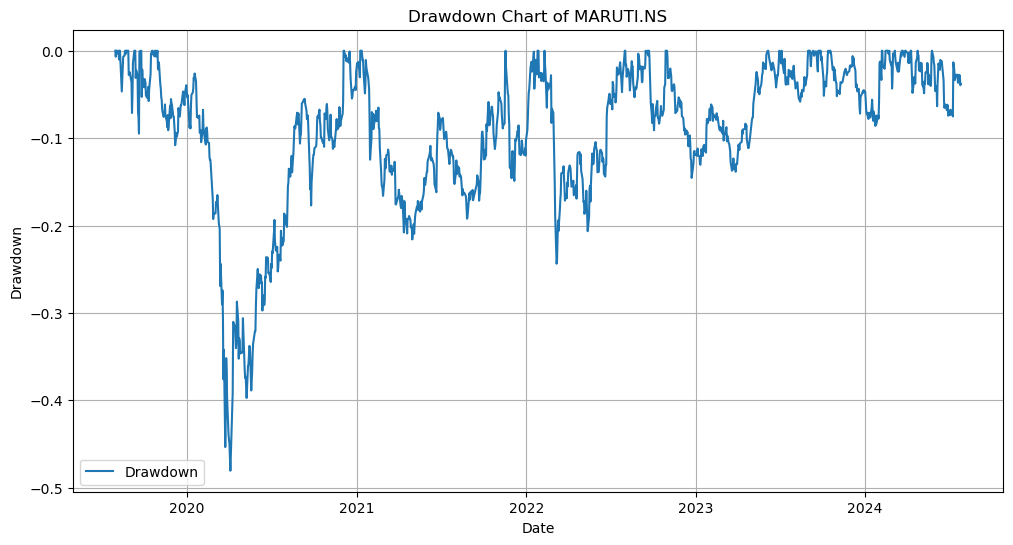

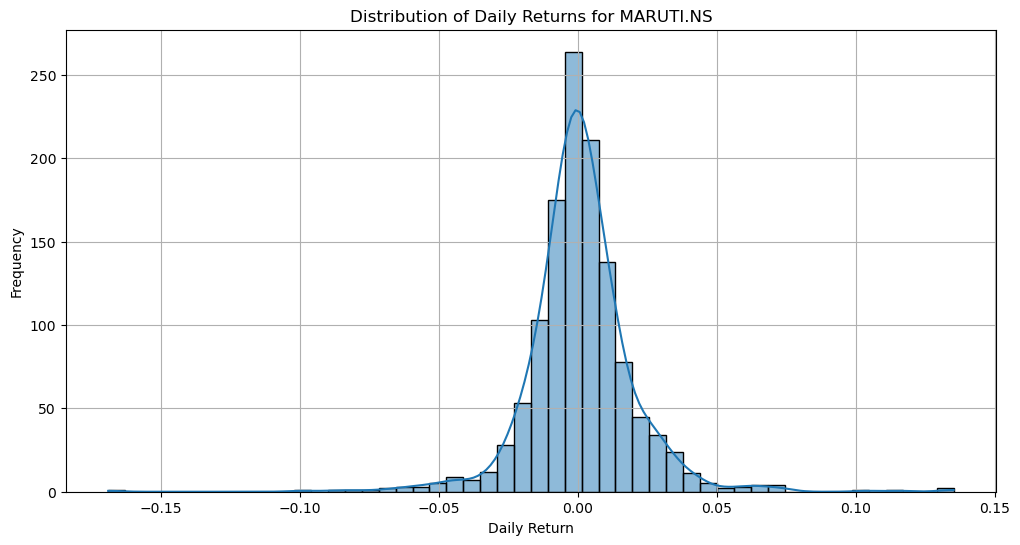

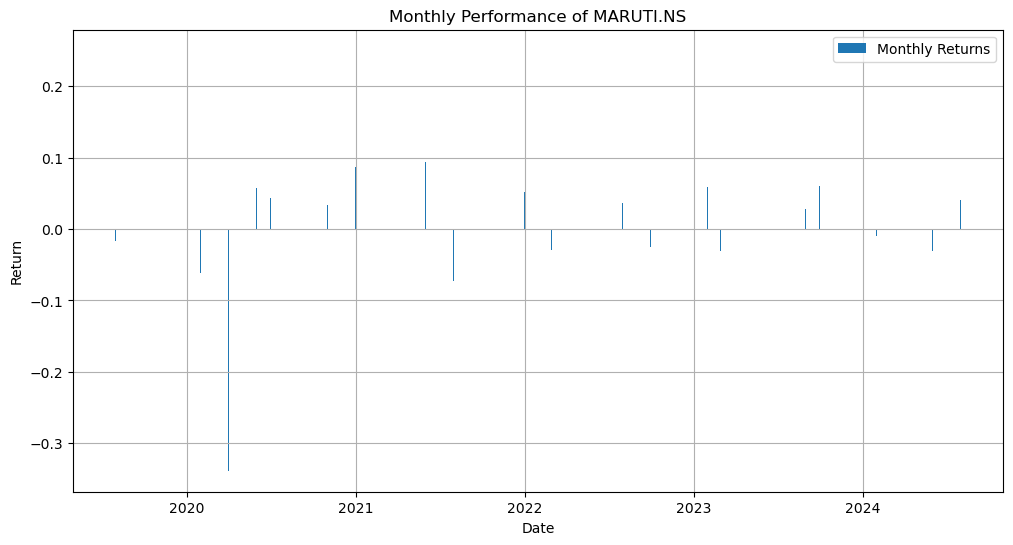

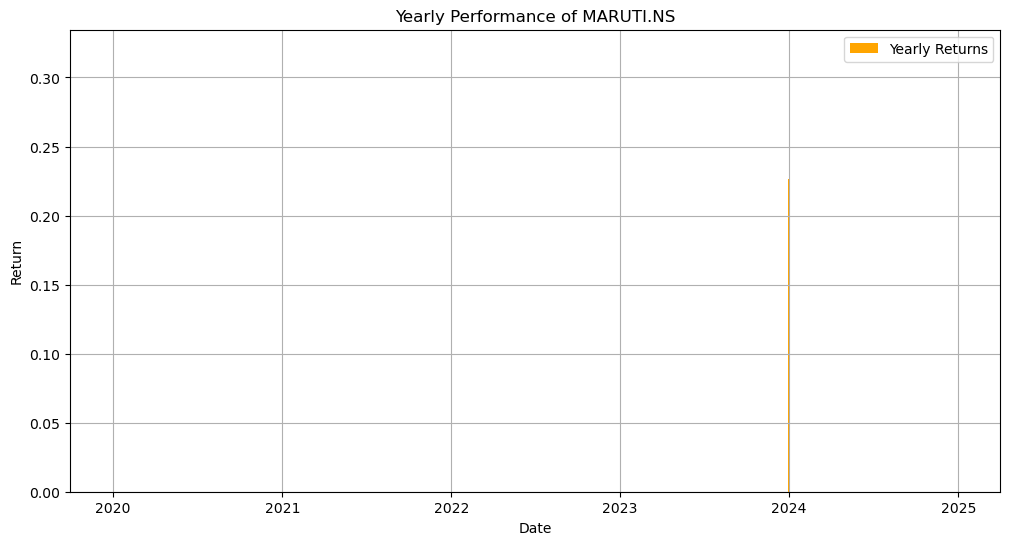

In [89]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/MARUTI.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of MARUTI.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of MARUTI.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for MARUTI.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of MARUTI.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of MARUTI.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [90]:
# 18 --> NTPC.NS

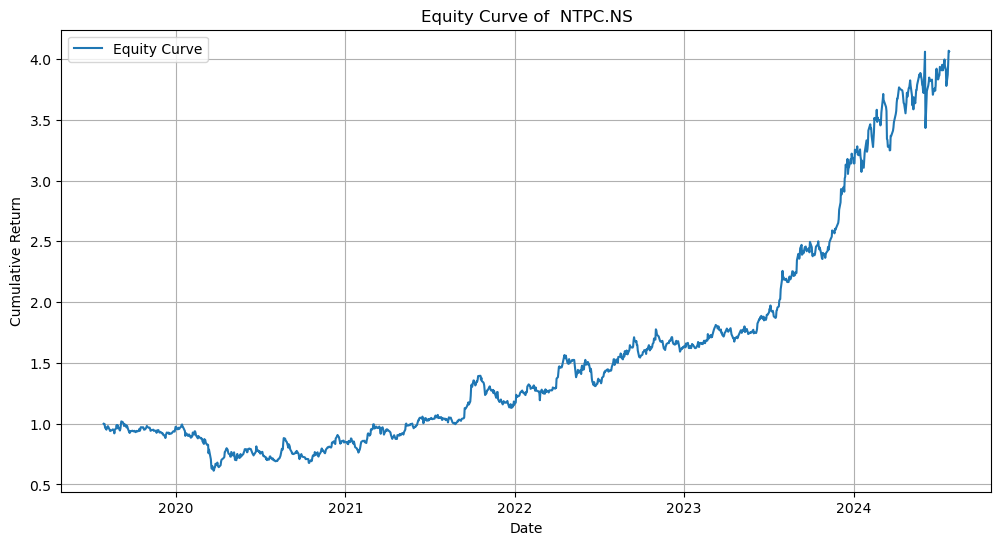

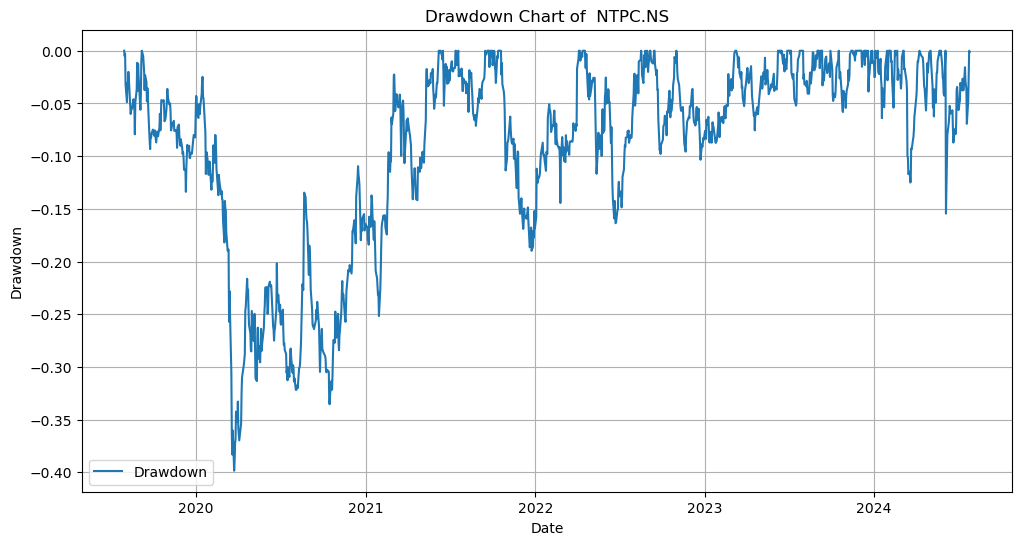

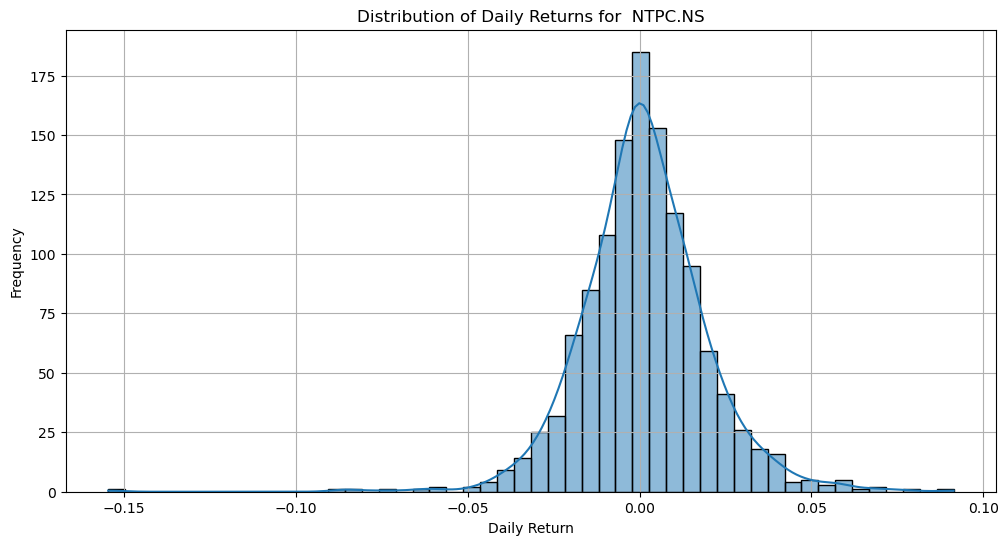

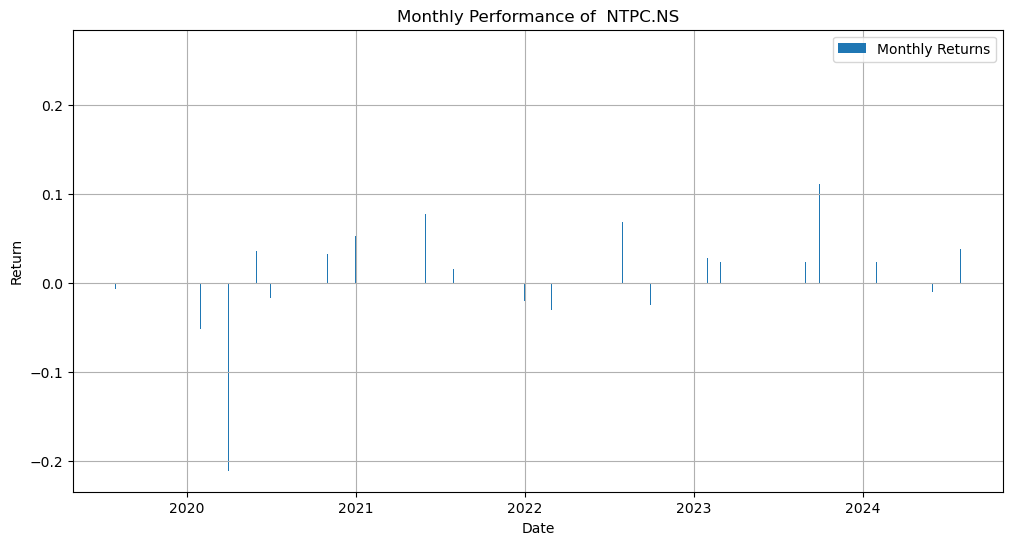

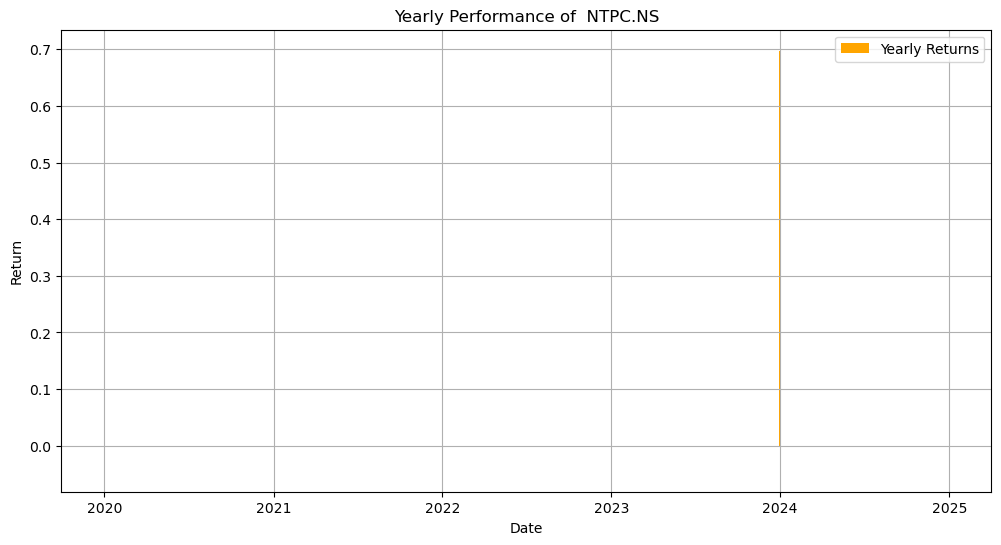

In [91]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/NTPC.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of  NTPC.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of  NTPC.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for  NTPC.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of  NTPC.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of  NTPC.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [92]:
# 19 --> AXISBANK.NS

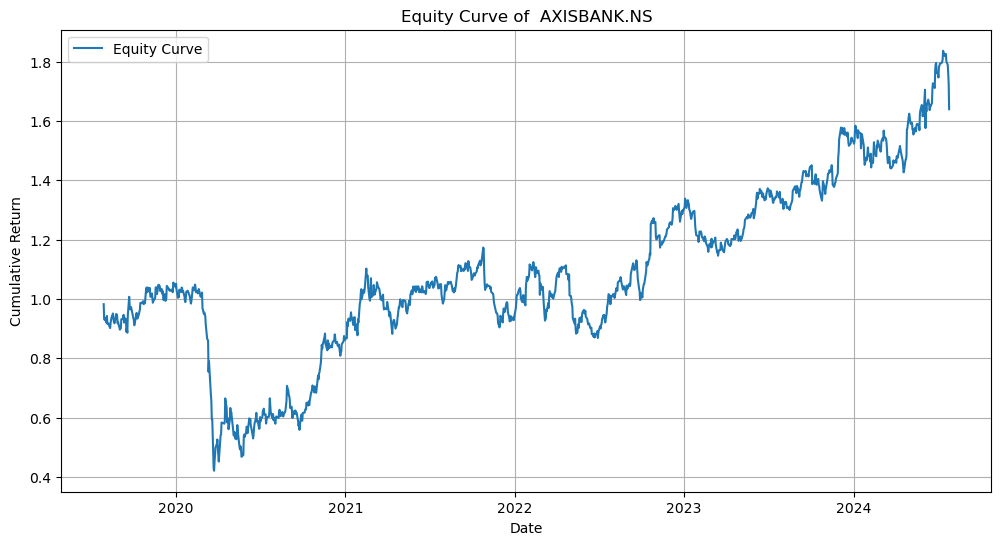

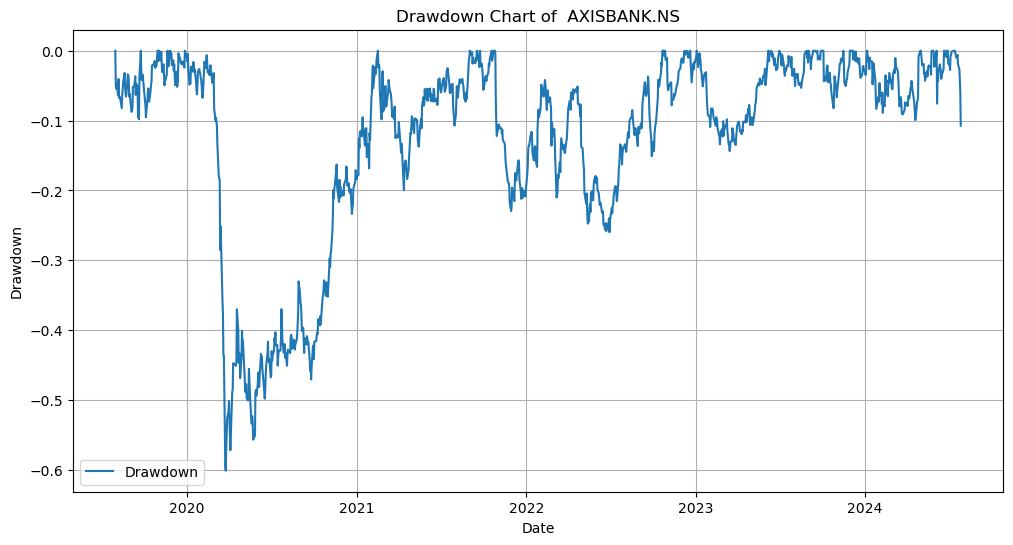

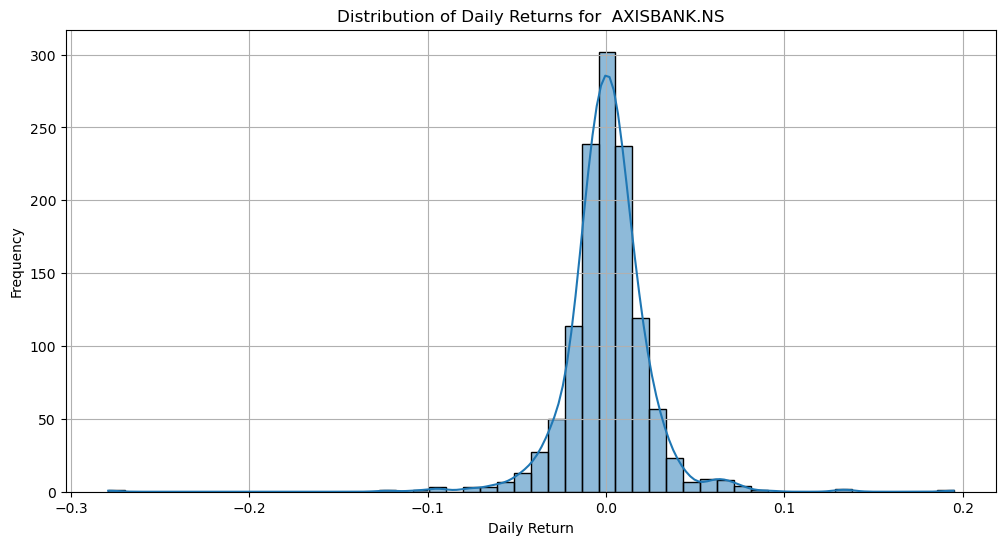

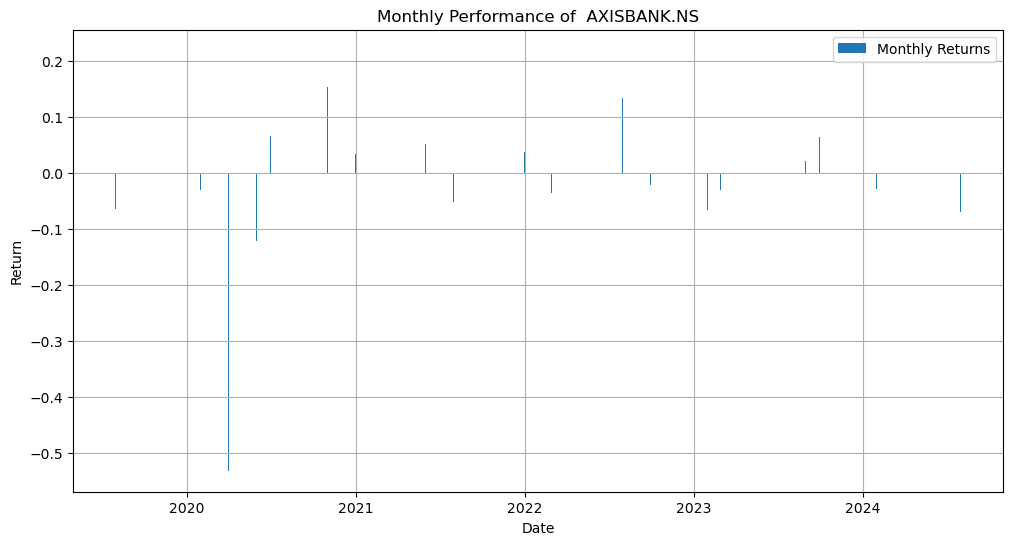

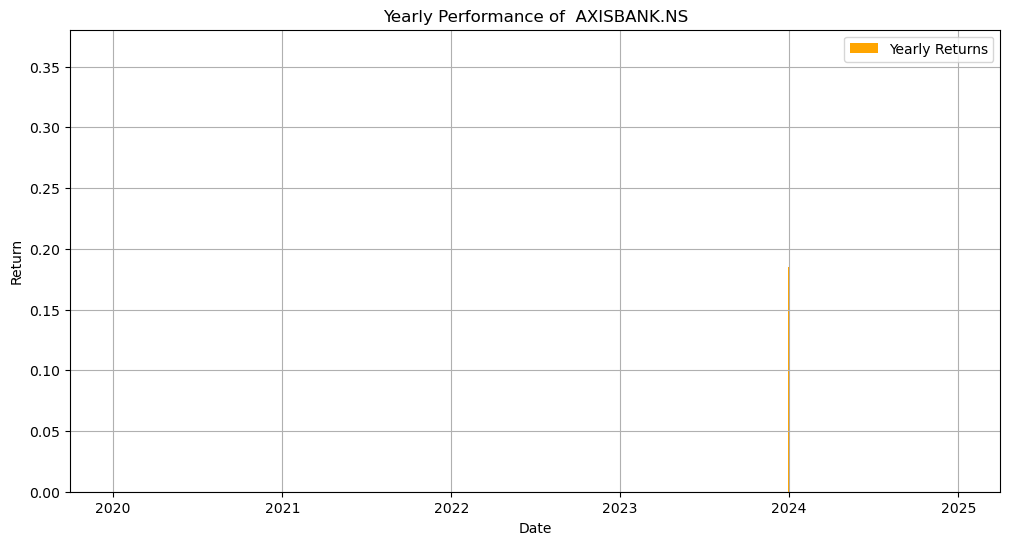

In [93]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/AXISBANK.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of  AXISBANK.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of  AXISBANK.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for  AXISBANK.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of  AXISBANK.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of  AXISBANK.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [94]:
# 20 --> KOTAKBANK.NS

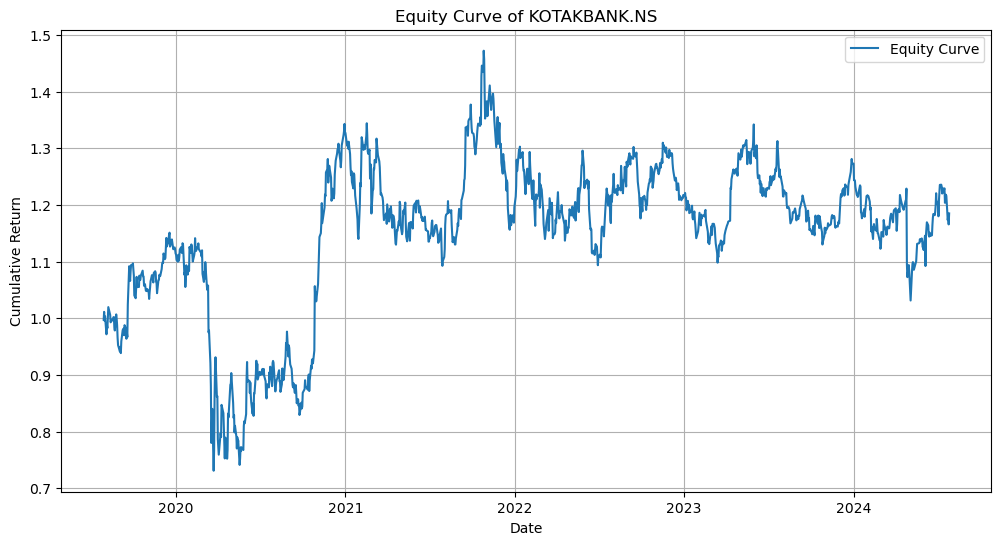

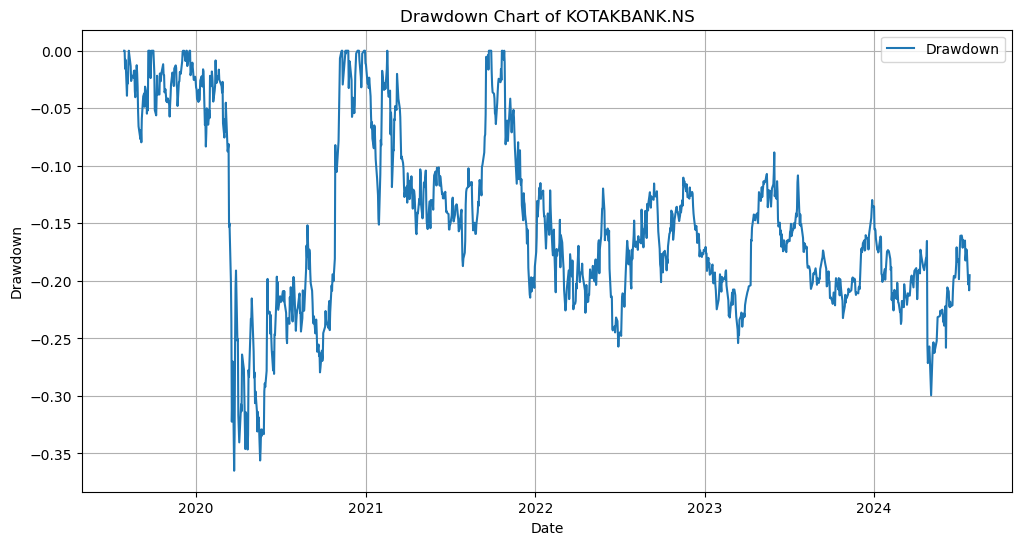

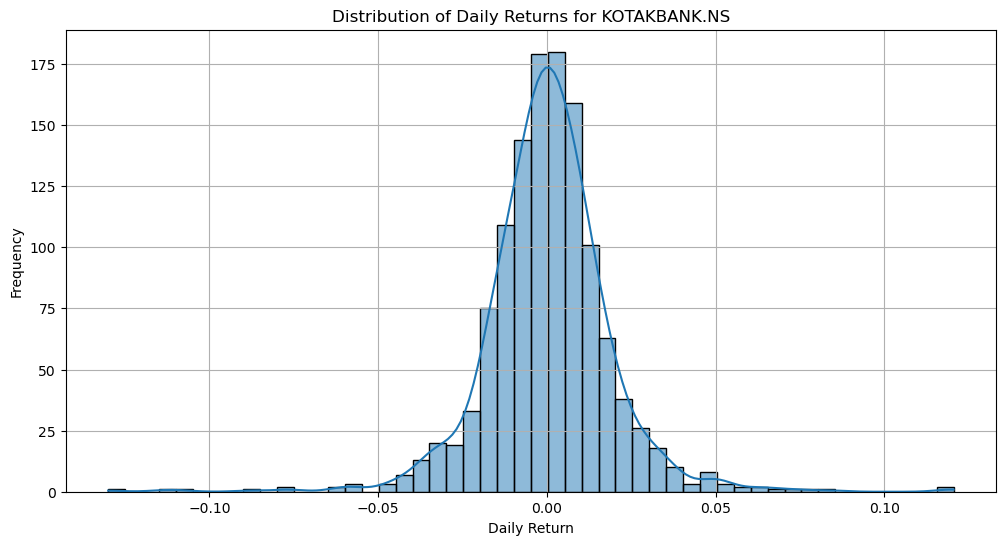

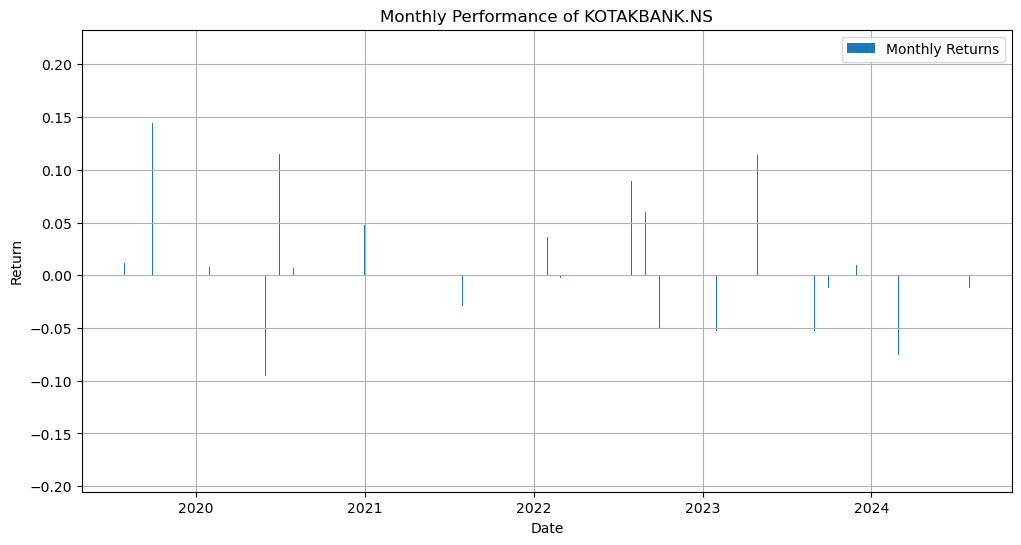

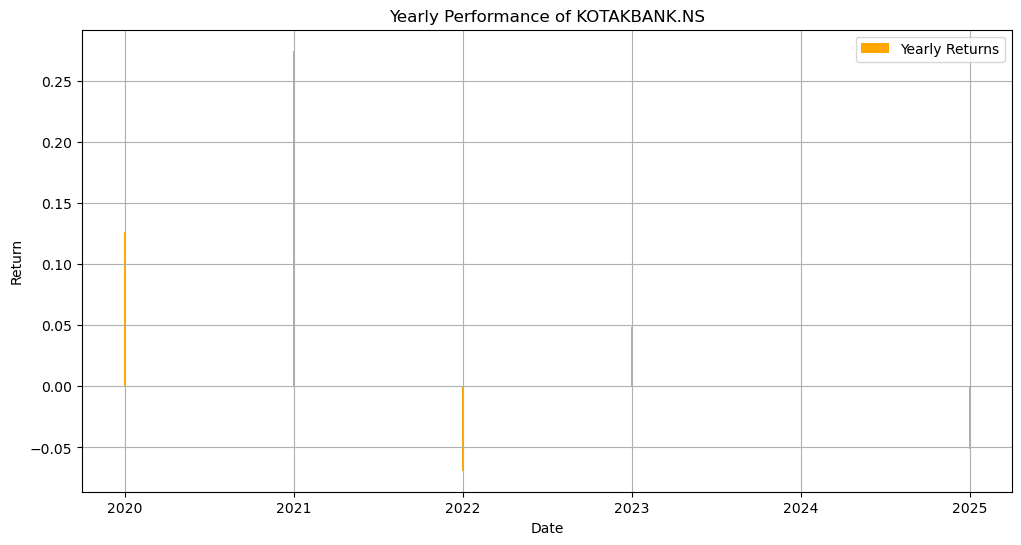

In [95]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/KOTAKBANK.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of KOTAKBANK.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of KOTAKBANK.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for KOTAKBANK.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of KOTAKBANK.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of KOTAKBANK.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [96]:
# 20 --> M&M.NS

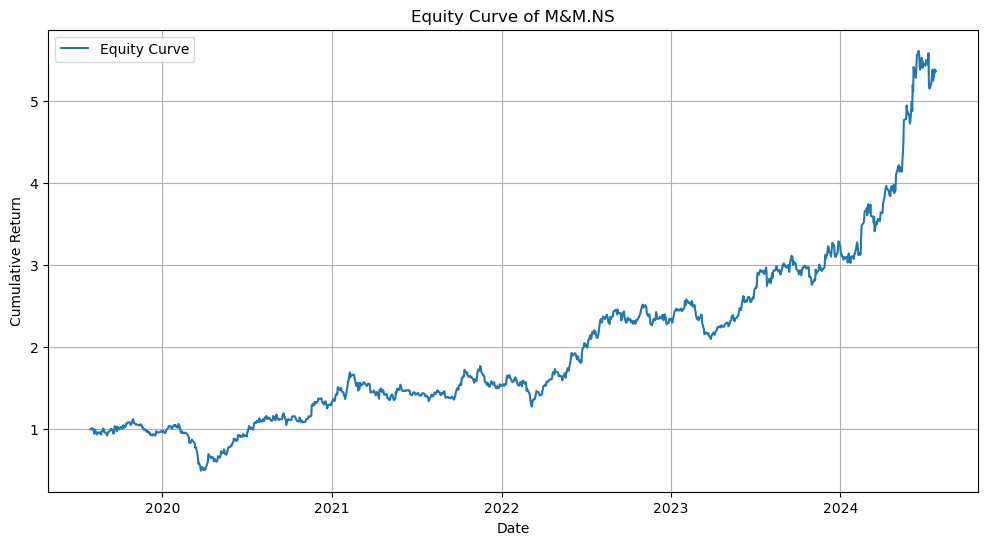

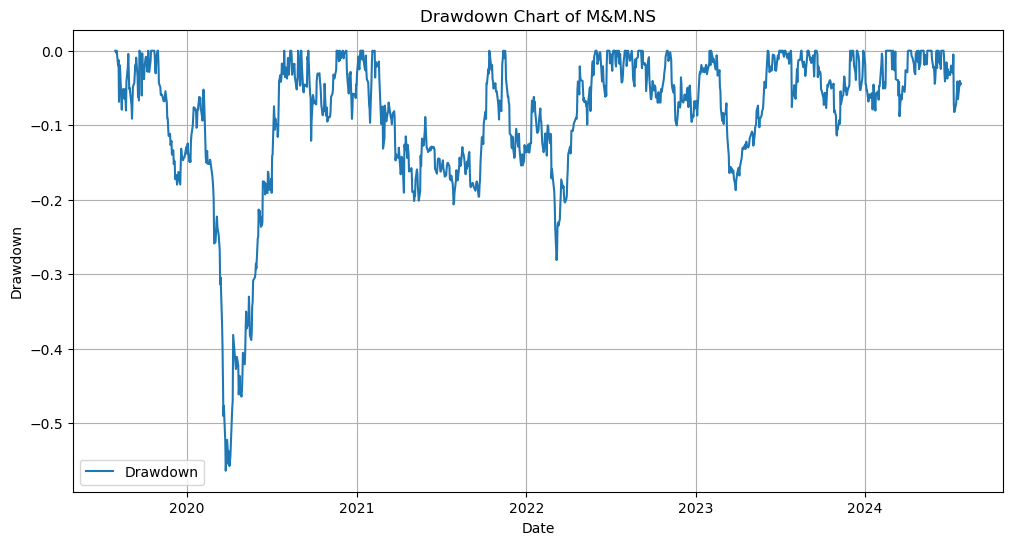

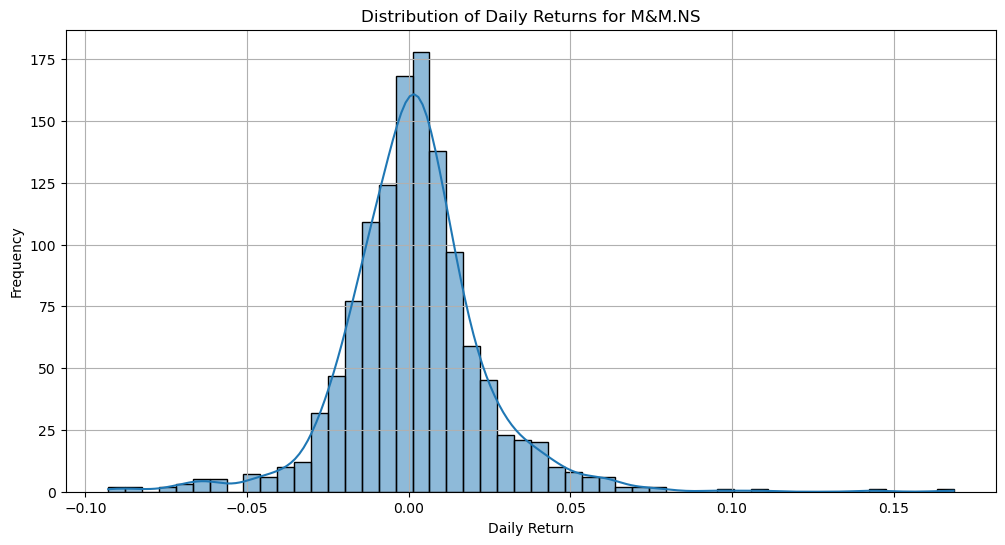

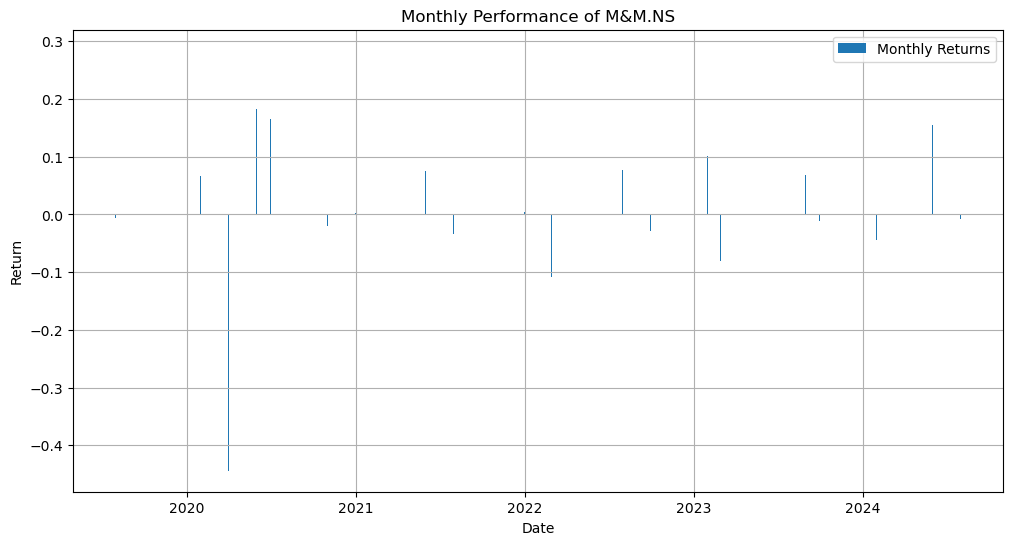

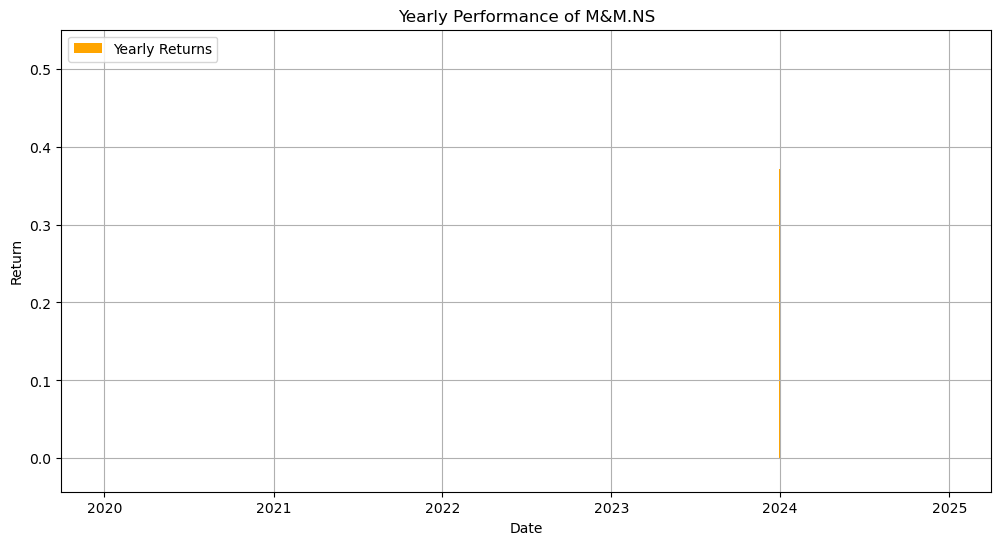

In [97]:
# Sample data: replace with actual data
data_re = pd.read_csv("/Users/saklenshaikh/Desktop/Fox_Trading_Assignment_saklenShaikh_csd02_078/Comanies_Wise_Historical_data/M&M.NS_historical_data.csv",parse_dates=['Date'], index_col='Date')
data_re['Return'] = data_re['Adj Close'].pct_change()
data_re['Cumulative Return'] = (1 + data_re['Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Cumulative Return'], label='Equity Curve')
plt.title('Equity Curve of M&M.NS')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


data_re['High'] = data_re['Cumulative Return'].cummax()
data_re['Drawdown'] = (data_re['Cumulative Return'] - data_re['High']) / data_re['High']

plt.figure(figsize=(12, 6))
plt.plot(data_re.index, data_re['Drawdown'], label='Drawdown')
plt.title('Drawdown Chart of M&M.NS')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_re['Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns for M&M.NS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to monthly and yearly returns
monthly_returns = data_re['Return'].resample('M').sum()
yearly_returns = data_re['Return'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns, label='Monthly Returns')
plt.title('Monthly Performance of M&M.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index, yearly_returns, label='Yearly Returns', color='orange')
plt.title('Yearly Performance of M&M.NS')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


# Discuss How Market Conditions (e.g., Bull vs. Bear Markets) Affected the Strategy's Performance

# Suggest potential improvements or modifications to the strategy based on your analysis.

In [ ]:
## Comprehensive report "
